# Loading Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('diabetic_data - UCI.csv')

# Quick look at the data
print(df.shape)
print(df.head())
print(df.dtypes)


(101766, 50)
   encounter_id  patient_nbr             race  gender      age weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital payer_code         medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted
0       2278392      8222157        Caucasian  Female   [0-10)      ?                  6                        25                    1                 1          ?  Pediatrics-Endocrinology                  41               0                1                  0               

This output shows that the dataset contains 101766 rows and 50 features. The target column (readmitted) uses three labels: 'NO'(Not readmitted), '<30'(Radmitted within 30 days), and '>30(readmitted after 30 days)'.

# Updating data types

Converting all demographic, admission, and medication columns to categorical type .

COnverting max_glu_serum and A1Cresult as ordered (ordinal) categories.

In [33]:
import pandas as pd

# Convert categorical columns to category dtype
category_cols = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'payer_code', 'medical_specialty','diag_1','diag_2','diag_3', 'change',
    'diabetesMed', 'readmitted'
]
med_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]
for col in category_cols + med_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert max_glu_serum and A1Cresult to ordered (ordinal) categories
glu_levels = ['None', 'Norm', '>200', '>300']
a1c_levels = ['None', 'Norm', '>7', '>8']
df['max_glu_serum'] = pd.Categorical(df['max_glu_serum'], categories=glu_levels, ordered=True)
df['A1Cresult'] = pd.Categorical(df['A1Cresult'], categories=a1c_levels, ordered=True)

print("All datatypes have been set appropriately.")
print(df.dtypes)


All datatypes have been set appropriately.
encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                        object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 cate

# Target Variable

**Three new target variables are created**

**target_option1** groups all readmissions (<30 and >30) as 'Yes' and 'NO' as 'No'.

**target_option2** uses only 'NO' and '<30' entries, treating '<30' as 'Yes' and 'NO' as 'No', and ignores '>30'.

**target_option3** sets '<30' as 'Yes' and combines 'NO' and '>30' as 'No'.

In [34]:
# Option 1: No vs Yes (>30 and <30 combined as Yes)
df['target_option1'] = df['readmitted'].apply(lambda x: 'Yes' if x in ['<30', '>30'] else 'No')

# Option 2: No vs <30 (ignore >30)
df_option2 = df[df['readmitted'].isin(['NO', '<30'])].copy()
df_option2['target_option2'] = df_option2['readmitted'].apply(lambda x: 'Yes' if x == '<30' else 'No')

# Option 3: <30 vs (NO + >30 combined as No)
df['target_option3'] = df['readmitted'].apply(lambda x: 'Yes' if x == '<30' else 'No')

# Display class distribution for each option
print("Option 1 counts:\n", df['target_option1'].value_counts())
print("\nOption 2 counts:\n", df_option2['target_option2'].value_counts())
print("\nOption 3 counts:\n", df['target_option3'].value_counts())

Option 1 counts:
 target_option1
No     54864
Yes    46902
Name: count, dtype: int64

Option 2 counts:
 target_option2
No     54864
Yes    11357
Name: count, dtype: int64

Option 3 counts:
 target_option3
No     90409
Yes    11357
Name: count, dtype: int64


**Option 1:**
Groups all readmitted patients together.

Not readmitted: 54%

Readmitted (any time): 46%

**Option 2:**
Compares patients not readmitted to those readmitted within 30 days (excludes >30 days).

Not readmitted: 83%

Readmitted within 30 days: 17%

**Option 3:**
Highlights only patients readmitted within 30 days vs. all others.

Not readmitted or readmitted after 30 days: 89%

Readmitted within 30 days: 11%

**Summary statistics for numeric features are compared across all three target options**

In [35]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)

numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Option 1: All encounters
print("Option 1 (No vs Yes [>30 and <30]) summary stats:")
display(df.groupby('target_option1')[numeric_cols].describe().transpose())

# Option 2: Only encounters with 'NO' and '<30'
print("\nOption 2 (No vs <30) summary stats:")
display(df_option2.groupby('target_option2')[numeric_cols].describe().transpose())

# Option 3: All encounters
print("\nOption 3 (<30 vs [NO + >30]) summary stats:")
display(df.groupby('target_option3')[numeric_cols].describe().transpose())

Option 1 (No vs Yes [>30 and <30]) summary stats:


target_option1                      No           Yes
time_in_hospital   count  54864.000000  46902.000000
                   mean       4.254429      4.561575
                   std        2.964964      3.000066
                   min        1.000000      1.000000
                   25%        2.000000      2.000000
                   50%        3.000000      4.000000
                   75%        6.000000      6.000000
                   max       14.000000     14.000000
num_lab_procedures count  54864.000000  46902.000000
                   mean      42.381598     43.930898
                   std       19.796262     19.497857
                   min        1.000000      1.000000
                   25%       30.000000     33.000000
                   50%       44.000000     45.000000
                   75%       56.000000     58.000000
                   max      126.000000    132.000000
num_procedures     count  54864.000000  46902.000000
                   mean       1.410305      1.257175
                   std        1.739693      1.661512
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        1.000000      1.000000
                   75%        2.000000      2.000000
                   max        6.000000      6.000000
num_medications    count  54864.000000  46902.000000
                   mean      15.670367     16.432988
                   std        8.427628      7.741725
                   min        1.000000      1.000000
                   25%       10.000000     11.000000
                   50%       14.000000     15.000000
                   75%       20.000000     20.000000
                   max       79.000000     81.000000
number_outpatient  count  54864.000000  46902.000000
                   mean       0.273112      0.481941
                   std        1.030704      1.489422
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max       36.000000     42.000000
number_emergency   count  54864.000000  46902.000000
                   mean       0.109216      0.301501
                   std        0.523609      1.240125
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max       37.000000     76.000000
number_inpatient   count  54864.000000  46902.000000
                   mean       0.381963      0.932220
                   std        0.864301      1.556711
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      1.000000
                   max       16.000000     21.000000
number_diagnoses   count  54864.000000  46902.000000
                   mean       7.221366      7.658010
                   std        2.017054      1.802895
                   min        1.000000      1.000000
                   25%        6.000000      6.000000
                   50%        8.000000      9.000000
                   75%        9.000000      9.000000
                   max       16.000000     16.000000


Option 2 (No vs <30) summary stats:


target_option2                      No           Yes
time_in_hospital   count  54864.000000  11357.000000
                   mean       4.254429      4.768249
                   std        2.964964      3.028165
                   min        1.000000      1.000000
                   25%        2.000000      2.000000
                   50%        3.000000      4.000000
                   75%        6.000000      6.000000
                   max       14.000000     14.000000
num_lab_procedures count  54864.000000  11357.000000
                   mean      42.381598     44.226028
                   std       19.796262     19.276087
                   min        1.000000      1.000000
                   25%       30.000000     33.000000
                   50%       44.000000     45.000000
                   75%       56.000000     58.000000
                   max      126.000000    132.000000
num_procedures     count  54864.000000  11357.000000
                   mean       1.410305      1.280884
                   std        1.739693      1.635992
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        1.000000      1.000000
                   75%        2.000000      2.000000
                   max        6.000000      6.000000
num_medications    count  54864.000000  11357.000000
                   mean      15.670367     16.903143
                   std        8.427628      8.096696
                   min        1.000000      1.000000
                   25%       10.000000     11.000000
                   50%       14.000000     16.000000
                   75%       20.000000     21.000000
                   max       79.000000     81.000000
number_outpatient  count  54864.000000  11357.000000
                   mean       0.273112      0.436911
                   std        1.030704      1.302788
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max       36.000000     40.000000
number_emergency   count  54864.000000  11357.000000
                   mean       0.109216      0.357313
                   std        0.523609      1.370384
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max       37.000000     64.000000
number_inpatient   count  54864.000000  11357.000000
                   mean       0.381963      1.224003
                   std        0.864301      1.954577
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      2.000000
                   max       16.000000     21.000000
number_diagnoses   count  54864.000000  11357.000000
                   mean       7.221366      7.692789
                   std        2.017054      1.773477
                   min        1.000000      1.000000
                   25%        6.000000      6.000000
                   50%        8.000000      9.000000
                   75%        9.000000      9.000000
                   max       16.000000     16.000000


Option 3 (<30 vs [NO + >30]) summary stats:


target_option3                      No           Yes
time_in_hospital   count  90409.000000  11357.000000
                   mean       4.349224      4.768249
                   std        2.976382      3.028165
                   min        1.000000      1.000000
                   25%        2.000000      2.000000
                   50%        4.000000      4.000000
                   75%        6.000000      6.000000
                   max       14.000000     14.000000
num_lab_procedures count  90409.000000  11357.000000
                   mean      42.953644     44.226028
                   std       19.719348     19.276087
                   min        1.000000      1.000000
                   25%       31.000000     33.000000
                   50%       44.000000     45.000000
                   75%       57.000000     58.000000
                   max      129.000000    132.000000
num_procedures     count  90409.000000  11357.000000
                   mean       1.347123      1.280884
                   std        1.714242      1.635992
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        1.000000      1.000000
                   75%        2.000000      2.000000
                   max        6.000000      6.000000
num_medications    count  90409.000000  11357.000000
                   mean      15.911137     16.903143
                   std        8.124725      8.096696
                   min        1.000000      1.000000
                   25%       10.000000     11.000000
                   50%       15.000000     16.000000
                   75%       20.000000     21.000000
                   max       79.000000     81.000000
number_outpatient  count  90409.000000  11357.000000
                   mean       0.360871      0.436911
                   std        1.262484      1.302788
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max       42.000000     40.000000
number_emergency   count  90409.000000  11357.000000
                   mean       0.177803      0.357313
                   std        0.857353      1.370384
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max       76.000000     64.000000
number_inpatient   count  90409.000000  11357.000000
                   mean       0.561648      1.224003
                   std        1.125315      1.954577
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        1.000000      2.000000
                   max       19.000000     21.000000
number_diagnoses   count  90409.000000  11357.000000
                   mean       7.388667      7.692789
                   std        1.950151      1.773477
                   min        1.000000      1.000000
                   25%        6.000000      6.000000
                   50%        8.000000      9.000000
                   75%        9.000000      9.000000
                   max       16.000000     16.000000

In [36]:

numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Calculate mean for each group in all options
means_option1 = df.groupby('target_option1')[numeric_cols].mean().T
means_option2 = df_option2.groupby('target_option2')[numeric_cols].mean().T
means_option3 = df.groupby('target_option3')[numeric_cols].mean().T

# Calculate absolute difference between groups for each option
means_option1['abs_diff'] = abs(means_option1['Yes'] - means_option1['No'])
means_option2['abs_diff'] = abs(means_option2['Yes'] - means_option2['No'])
means_option3['abs_diff'] = abs(means_option3['Yes'] - means_option3['No'])

print("Mean comparison by group for Option 1:")
print(means_option1)
print("\nMean comparison by group for Option 2:")
print(means_option2)
print("\nMean comparison by group for Option 3:")
print(means_option3)


Mean comparison by group for Option 1:
target_option1             No        Yes  abs_diff
time_in_hospital     4.254429   4.561575  0.307146
num_lab_procedures  42.381598  43.930898  1.549300
num_procedures       1.410305   1.257175  0.153131
num_medications     15.670367  16.432988  0.762621
number_outpatient    0.273112   0.481941  0.208829
number_emergency     0.109216   0.301501  0.192285
number_inpatient     0.381963   0.932220  0.550258
number_diagnoses     7.221366   7.658010  0.436645

Mean comparison by group for Option 2:
target_option2             No        Yes  abs_diff
time_in_hospital     4.254429   4.768249  0.513820
num_lab_procedures  42.381598  44.226028  1.844430
num_procedures       1.410305   1.280884  0.129421
num_medications     15.670367  16.903143  1.232777
number_outpatient    0.273112   0.436911  0.163799
number_emergency     0.109216   0.357313  0.248097
number_inpatient     0.381963   1.224003  0.842040
number_diagnoses     7.221366   7.692789  0.471423

Me

**Decided to go ahead with Target option 2 (Readmitted within 30 days as Yes and No, while ignoring patients that are readmitted after 30 days)**

# Missing Values

In [37]:
#Check missing data in all columns
print("Missing values per column:")
print(df.isin(['?']).sum() + df.isnull().sum())



Missing values per column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride          

Columns like race, payer_code, medical_specialty, diag_1, diag_2, diag_3, max_glu_serum, and A1Cresult have missing data, with some columns missing a large proportion of values (for example, weight, medical_specialty, max_glu_serum, and A1Cresult). Most numeric and medication-related columns are complete, with no missing values.

For the max_glu_serum and A1Cresult columns, most entries are labeled as 'None', meaning the test was not conducted during the encounter. These are not missing values, but a valid result indicating no test. Only blank or NaN entries should be considered missing. For analysis, 'None' can be treated as its own category.

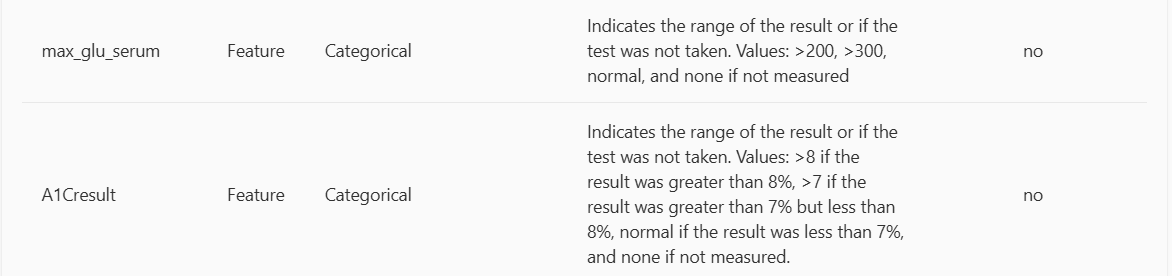

In [38]:
 #Checking True Missing (NaN) in max_glu_serum and A1Cresult

print("Blank (missing) in max_glu_serum:", (df['max_glu_serum'] == '?').sum())
print("Blank (missing) in A1Cresult:", (df['A1Cresult'] == '').sum())


Blank (missing) in max_glu_serum: 0
Blank (missing) in A1Cresult: 0


In [39]:
# Create indicator: 1 if weight is missing, 0 if present
df['weight_missing'] = df['weight'].isnull().astype(int)

#missingness flag is created for weight because almost all values are missing,
#so imputing or analyzing the variable would not add value and could introduce noise#


**Dropping Weight as i created missing flag. removed Encounter_id and patient_nbr because they unique identifiers for encounter and patient.**

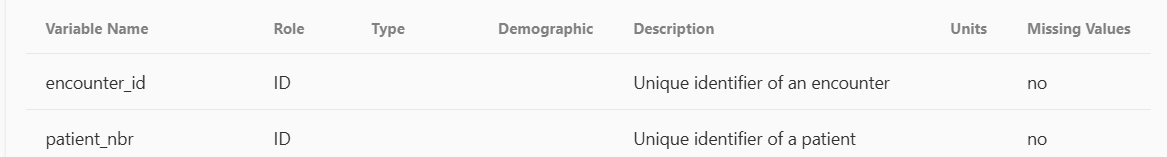

In [40]:

df = df.drop(columns=['weight','encounter_id', 'patient_nbr'])


In [41]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,target_option1,target_option3,weight_missing
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Yes,No,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,No,No,0
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,No,No,0
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,No,No,0


**Handling missing values with Target option 2 (selected option)**

In [42]:
print(df_option2.shape)
print(df_option2.head())
print(df_option2.dtypes)


(66221, 52)
   encounter_id  patient_nbr             race  gender      age weight admission_type_id discharge_disposition_id admission_source_id  time_in_hospital payer_code         medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted target_option1 target_option2
0       2278392      8222157        Caucasian  Female   [0-10)      ?                 6                       25                   1                 1          ?  Pediatrics-Endocrinology                  41               0                1           

In [43]:
# Count how many '?' values are in each column
missing_summary = df_option2.isin(['?']).sum().to_frame(name='missing_count')

# Calculate percentage of missing values
missing_summary['missing_percent'] = (missing_summary['missing_count'] / len(df_option2) * 100).round(2)

# Show all columns, including those with 0 missing
missing_summary = missing_summary.reset_index().rename(columns={'index': 'column'})
print(missing_summary)


                      column  missing_count  missing_percent
0               encounter_id              0             0.00
1                patient_nbr              0             0.00
2                       race           1735             2.62
3                     gender              0             0.00
4                        age              0             0.00
5                     weight          64534            97.45
6          admission_type_id              0             0.00
7   discharge_disposition_id              0             0.00
8        admission_source_id              0             0.00
9           time_in_hospital              0             0.00
10                payer_code          26428            39.91
11         medical_specialty          31733            47.92
12        num_lab_procedures              0             0.00
13            num_procedures              0             0.00
14           num_medications              0             0.00
15         number_outpat

**As seen above 97.45% of fields are missing in weights which imputing them would create noise to the data, hence dropping weight column while creating flag indicator for weight column**

In [44]:
# Create missing value flag for weight using NaN
df_option2['weight_missing'] = df_option2['weight'].isna().astype(int)


In [45]:
columns_to_drop = [
    'weight','encounter_id', 'patient_nbr',
    'readmitted', 'target_option1', 'target_option3'
]

df_option2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [46]:
print(df_option2.head(20))
print(df_option2.dtypes)

               race  gender       age admission_type_id discharge_disposition_id admission_source_id  time_in_hospital payer_code         medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed target_option2  weight_missing
0         Caucasian  Female    [0-10)                 6                       25                   1                 1          ?  Pediatrics-Endocrinology                  41               0                1                  0                 0                 0  250.83       ?      ?                 1 

None option in below variables are treated as NAAn which is incorrect, hence correcting them to None, which actually means that the test is not performed

In [47]:
# Fill NaN with 'None' if that's the intended label
df_option2['max_glu_serum'] = df_option2['max_glu_serum'].fillna('None')
df_option2['A1Cresult'] = df_option2['A1Cresult'].fillna('None')


In [48]:
df_option2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target_option2,weight_missing
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,0
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No,0
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No,0
6,Caucasian,Male,[60-70),3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No,0


# Distribution of key categorical variables

In [49]:
print(df_option2.dtypes)

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
g

In [50]:
cat_cols = list(set([
    'age', 'gender', 'race', 'admission_type_id', 'discharge_disposition_id', 'payer_code', 'medical_specialty',
    'diag_1', 'diag_2', 'diag_3', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'metformin',
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]))



🟩 LOW CARDINALITY CATEGORICAL VARIABLES


📊 Distribution for 'nateglinide':
             Count  Percent
nateglinide                
No           65780    99.33
Steady         420     0.63
Up              14     0.02
Down             7     0.01


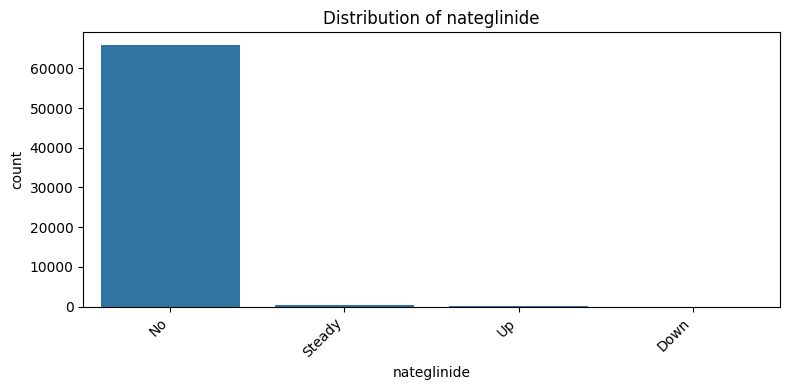


📊 Distribution for 'chlorpropamide':
                Count  Percent
chlorpropamide                
No              66169    99.92
Steady             50     0.08
Down                1     0.00
Up                  1     0.00


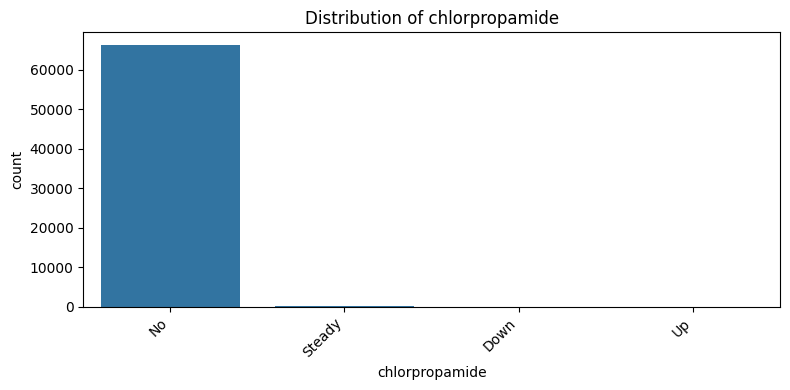


📊 Distribution for 'glyburide-metformin':
                     Count  Percent
glyburide-metformin                
No                   65773    99.32
Steady                 435     0.66
Up                       7     0.01
Down                     6     0.01


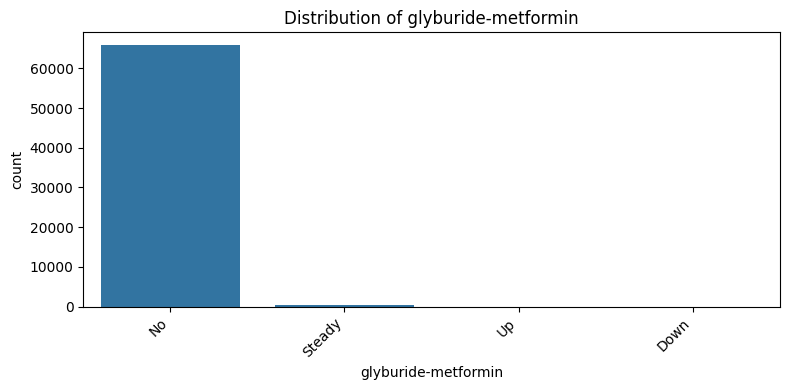


📊 Distribution for 'acetohexamide':
               Count  Percent
acetohexamide                
No             66221    100.0
Steady             0      0.0


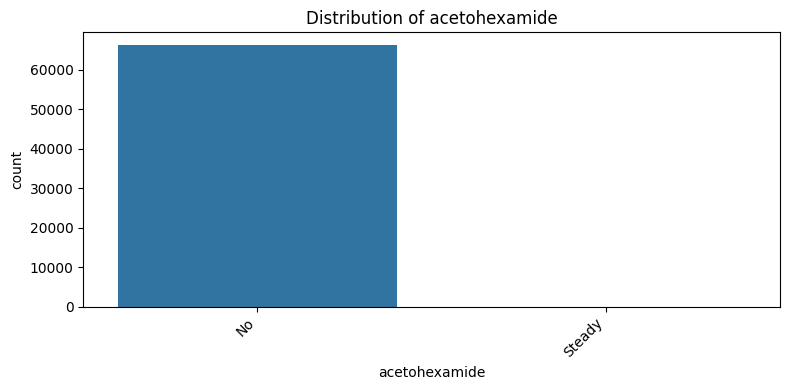


📊 Distribution for 'max_glu_serum':
               Count  Percent
max_glu_serum                
None           62811    94.85
Norm            1712     2.59
>200             955     1.44
>300             743     1.12


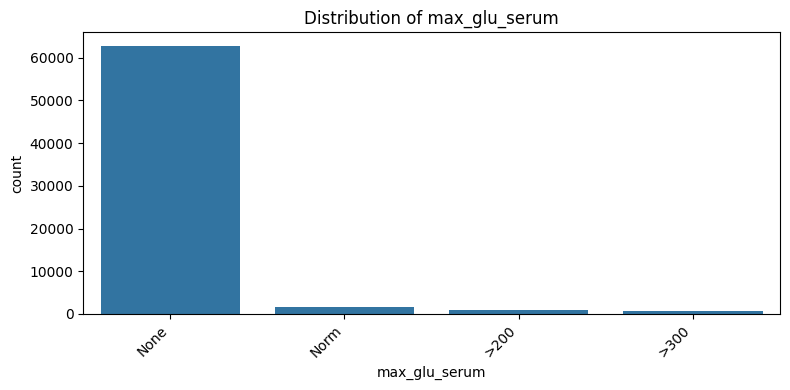


📊 Distribution for 'metformin-rosiglitazone':
                         Count  Percent
metformin-rosiglitazone                
No                       66219    100.0
Steady                       2      0.0


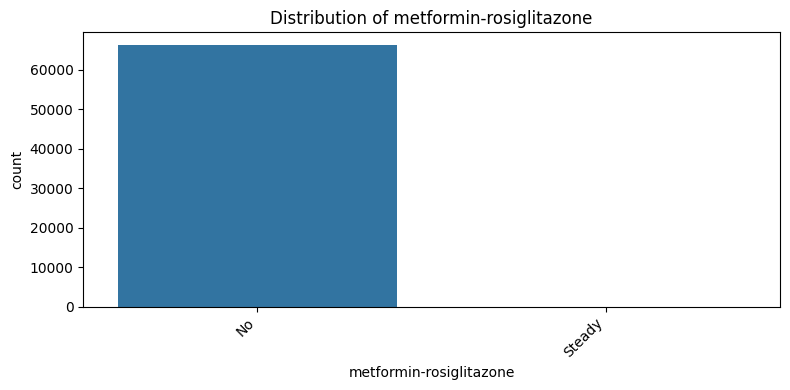


📊 Distribution for 'tolazamide':
            Count  Percent
tolazamide                
No          66192    99.96
Steady         29     0.04
Up              0     0.00


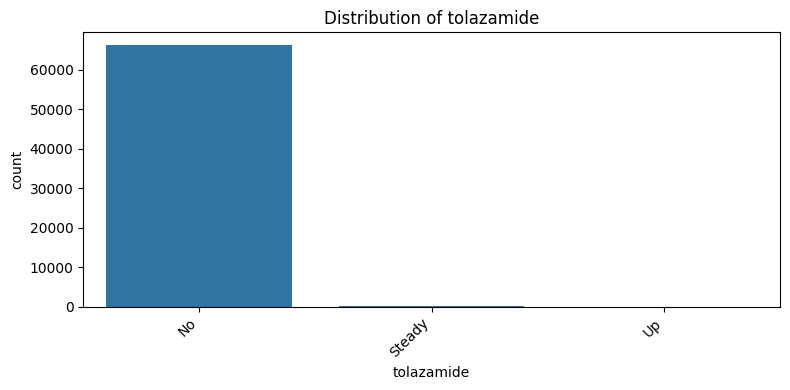


📊 Distribution for 'pioglitazone':
              Count  Percent
pioglitazone                
No            61650    93.10
Steady         4356     6.58
Up              142     0.21
Down             73     0.11


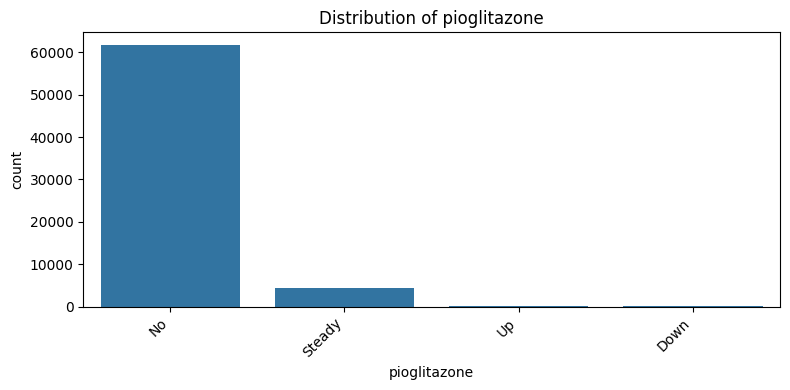


📊 Distribution for 'citoglipton':
             Count  Percent
citoglipton                
No           66221    100.0


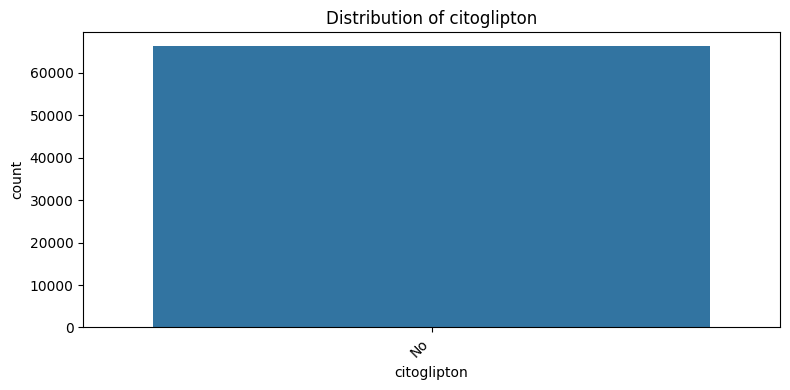


📊 Distribution for 'age':
          Count  Percent
age                     
[70-80)   16593    25.06
[60-70)   14586    22.03
[50-60)   11339    17.12
[80-90)   10974    16.57
[40-50)    6407     9.68
[30-40)    2588     3.91
[90-100)   1985     3.00
[20-30)    1147     1.73
[10-20)     467     0.71
[0-10)      135     0.20


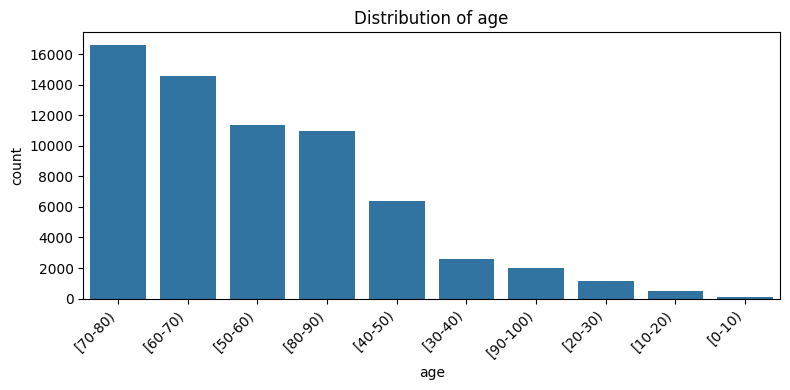


📊 Distribution for 'payer_code':
            Count  Percent
payer_code                
?           26428    39.91
MC          20457    30.89
HM           3954     5.97
BC           3354     5.06
SP           3138     4.74
MD           2273     3.43
UN           1752     2.65
CP           1752     2.65
CM           1276     1.93
OG            700     1.06
PO            448     0.68
DM            329     0.50
CH            113     0.17
WC            111     0.17
OT             57     0.09
MP             40     0.06
SI             38     0.06
FR              1     0.00


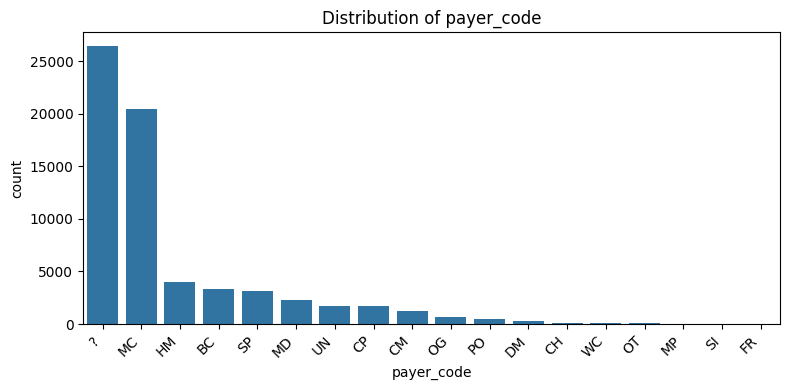


📊 Distribution for 'metformin-pioglitazone':
                        Count  Percent
metformin-pioglitazone                
No                      66220    100.0
Steady                      1      0.0


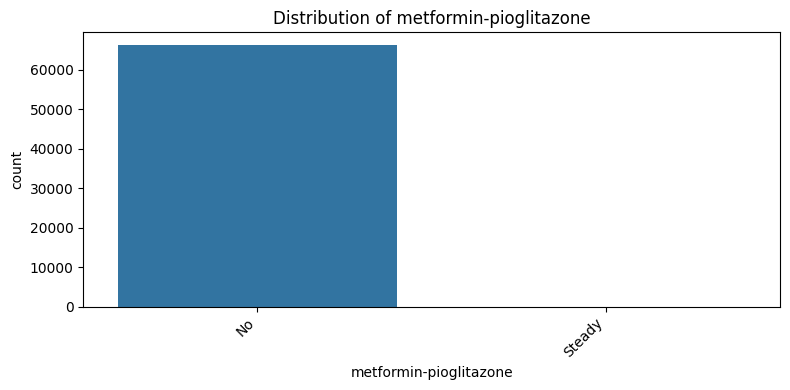


📊 Distribution for 'repaglinide':
             Count  Percent
repaglinide                
No           65322    98.64
Steady         796     1.20
Up              77     0.12
Down            26     0.04


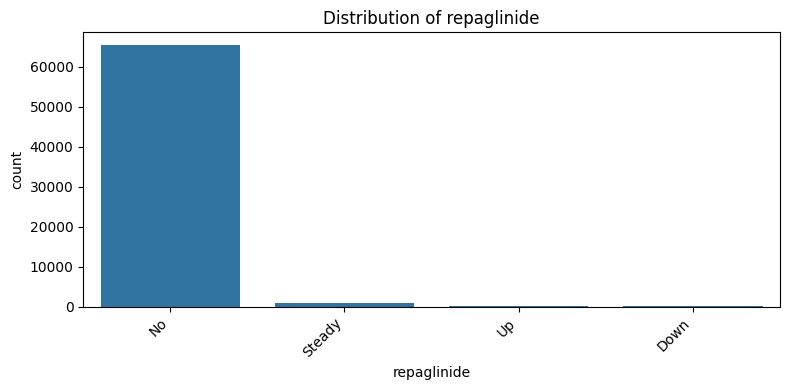


📊 Distribution for 'insulin':
         Count  Percent
insulin                
No       31434    47.47
Steady   20367    30.76
Down      7466    11.27
Up        6954    10.50


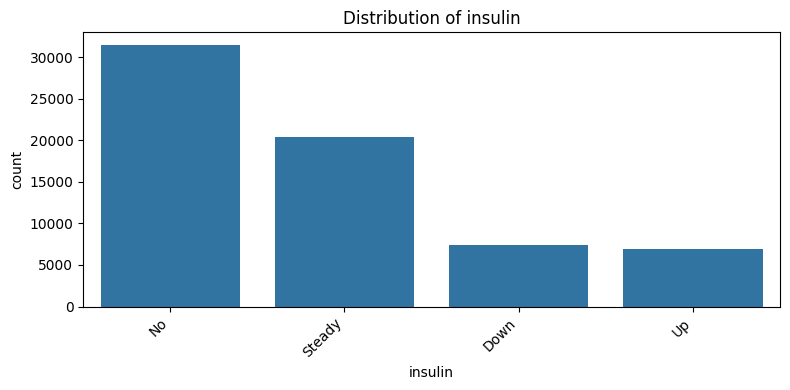


📊 Distribution for 'admission_source_id':
                     Count  Percent
admission_source_id                
7                    35827    54.10
1                    19925    30.09
17                    4323     6.53
4                     2515     3.80
6                     1866     2.82
2                      794     1.20
5                      619     0.93
3                      129     0.19
9                      109     0.16
20                      80     0.12
8                       12     0.02
22                       9     0.01
10                       6     0.01
11                       2     0.00
14                       2     0.00
25                       2     0.00
13                       1     0.00


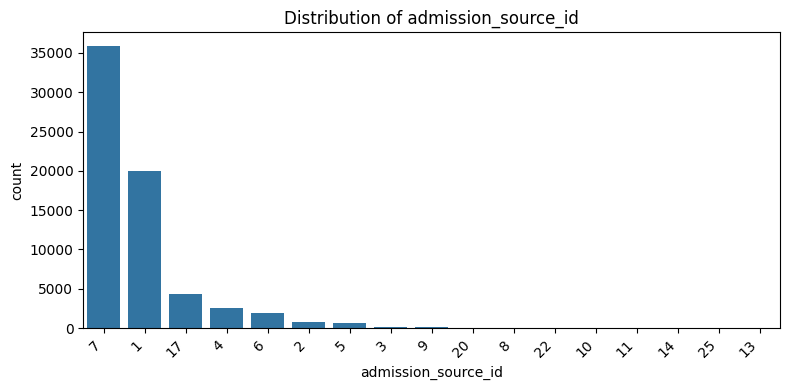


📊 Distribution for 'glimepiride':
             Count  Percent
glimepiride                
No           62937    95.04
Steady        2933     4.43
Up             225     0.34
Down           126     0.19


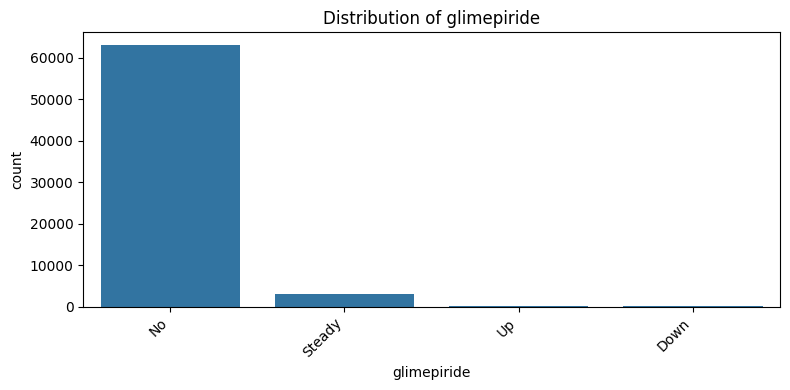


📊 Distribution for 'diabetesMed':
             Count  Percent
diabetesMed                
Yes          50045    75.57
No           16176    24.43


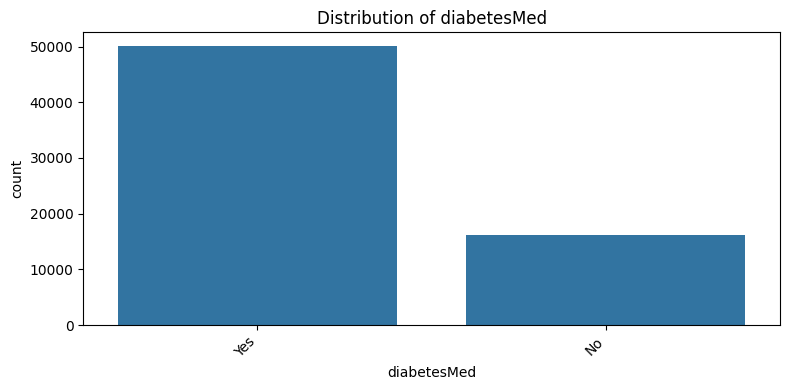


📊 Distribution for 'A1Cresult':
           Count  Percent
A1Cresult                
None       55003    83.06
>8          5315     8.03
Norm        3391     5.12
>7          2512     3.79


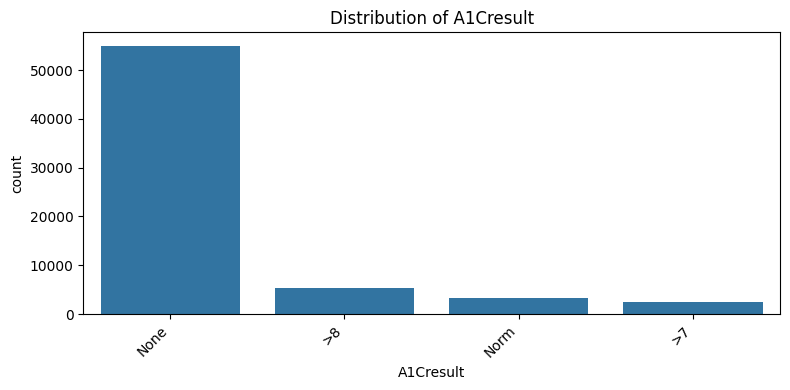


📊 Distribution for 'glipizide-metformin':
                     Count  Percent
glipizide-metformin                
No                   66215    99.99
Steady                   6     0.01


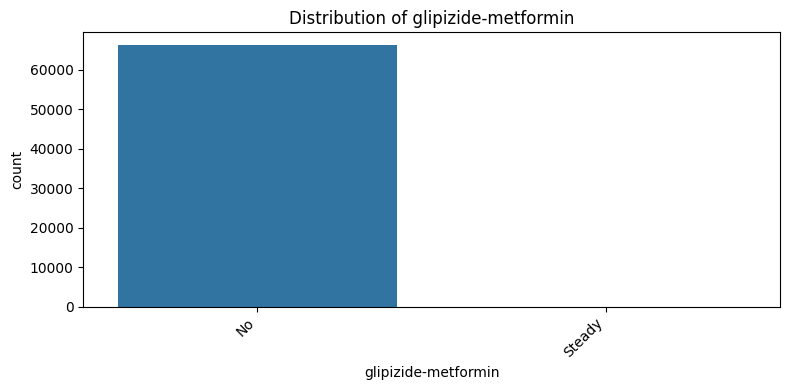


📊 Distribution for 'glyburide':
           Count  Percent
glyburide                
No         59289    89.53
Steady      6053     9.14
Up           538     0.81
Down         341     0.51


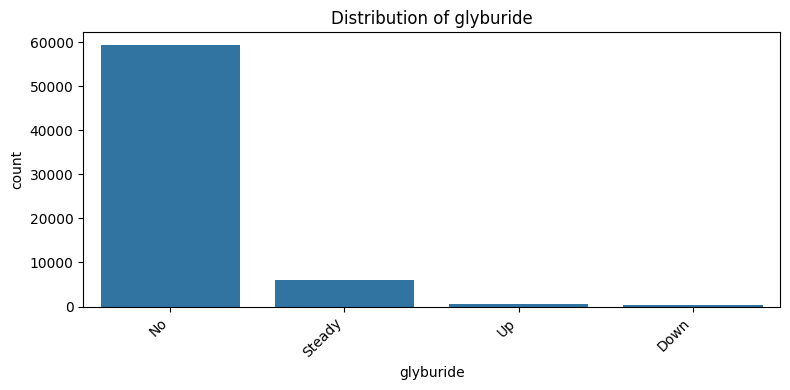


📊 Distribution for 'admission_type_id':
                   Count  Percent
admission_type_id                
1                  34681    52.37
3                  13123    19.82
2                  12028    18.16
5                   3064     4.63
6                   3060     4.62
8                    236     0.36
7                     21     0.03
4                      8     0.01


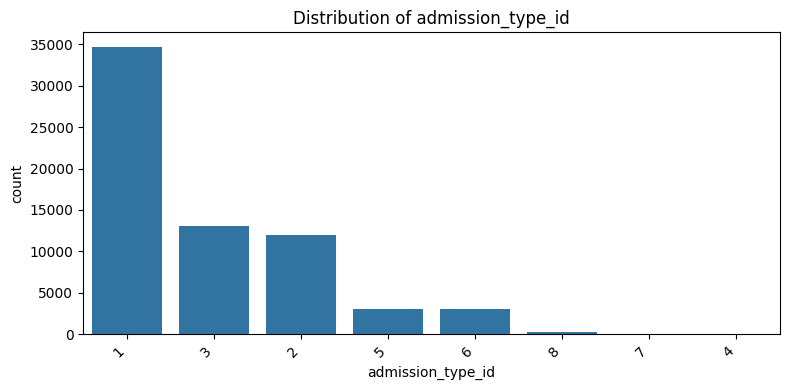


📊 Distribution for 'acarbose':
          Count  Percent
acarbose                
No        66068    99.77
Steady      145     0.22
Up            6     0.01
Down          2     0.00


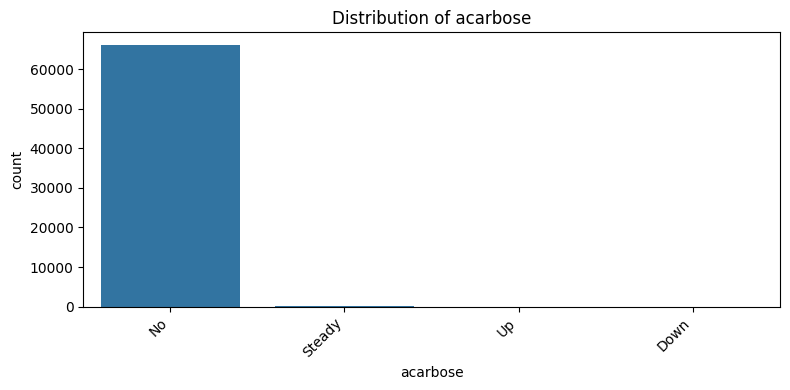


📊 Distribution for 'miglitol':
          Count  Percent
miglitol                
No        66203    99.97
Steady       15     0.02
Down          2     0.00
Up            1     0.00


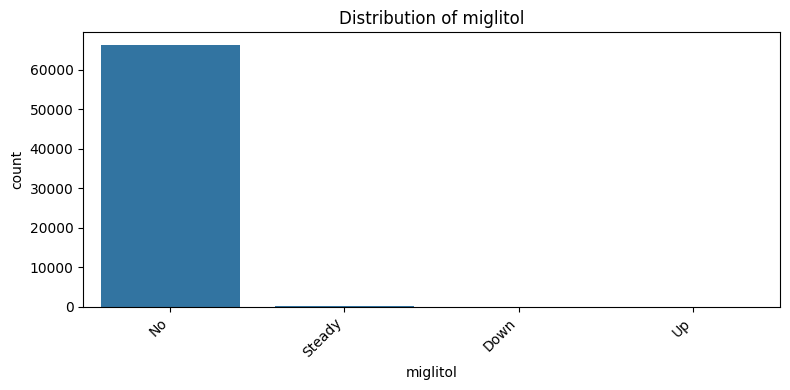


📊 Distribution for 'gender':
                 Count  Percent
gender                         
Female           35190    53.14
Male             31028    46.86
Unknown/Invalid      3     0.00


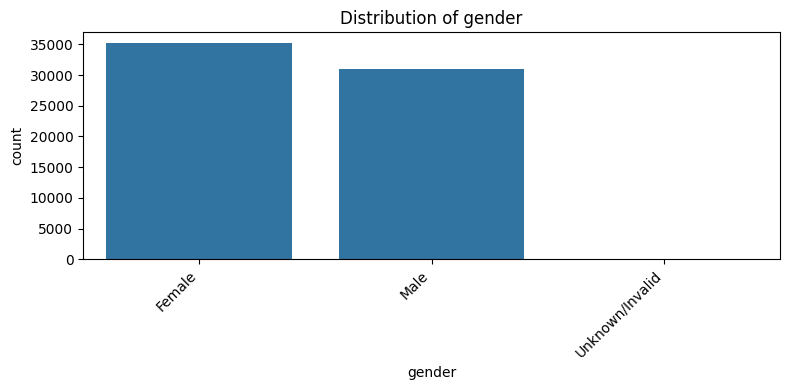


📊 Distribution for 'change':
        Count  Percent
change                
No      36482    55.09
Ch      29739    44.91


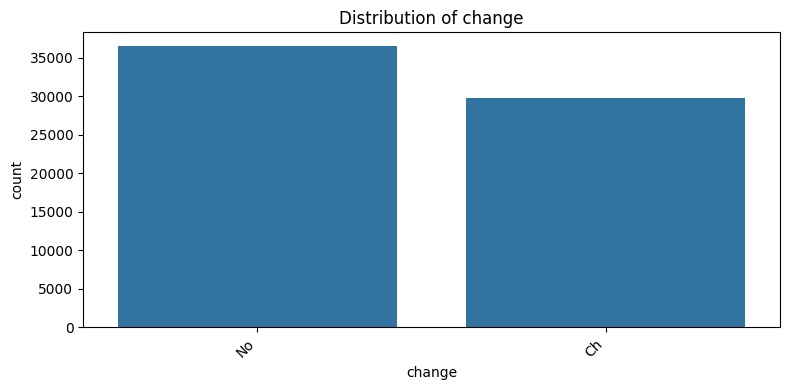


📊 Distribution for 'discharge_disposition_id':
                          Count  Percent
discharge_disposition_id                
1                         38717    58.47
3                          9038    13.65
6                          7540    11.39
18                         2664     4.02
11                         1642     2.48
22                         1474     2.23
2                          1460     2.20
5                           834     1.26
25                          613     0.93
4                           537     0.81
7                           402     0.61
14                          365     0.55
13                          363     0.55
23                          268     0.40
28                          105     0.16
8                            70     0.11
15                           45     0.07
24                           32     0.05
9                            19     0.03
17                            9     0.01
19                            8     0.01
16       

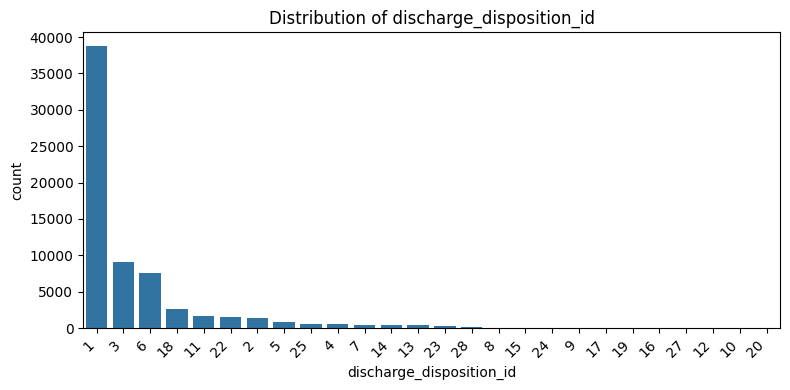


📊 Distribution for 'tolbutamide':
             Count  Percent
tolbutamide                
No           66205    99.98
Steady          16     0.02


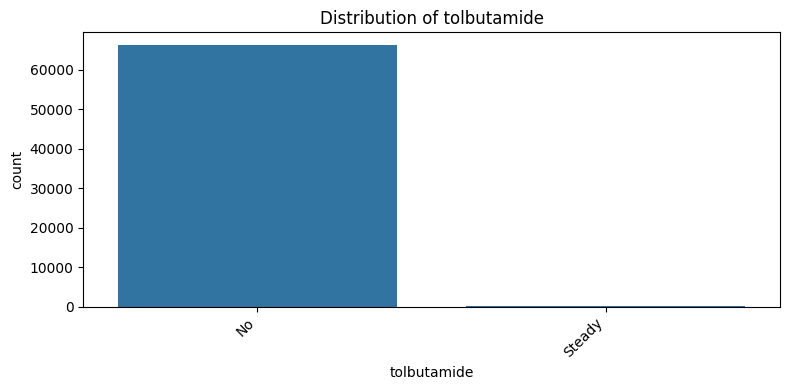


📊 Distribution for 'examide':
         Count  Percent
examide                
No       66221    100.0


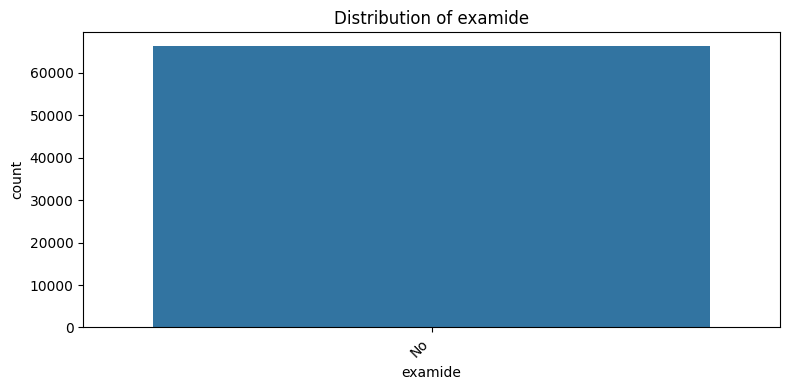


📊 Distribution for 'race':
                 Count  Percent
race                           
Caucasian        48975    73.96
AfricanAmerican  12576    18.99
?                 1735     2.62
Hispanic          1395     2.11
Other             1060     1.60
Asian              480     0.72


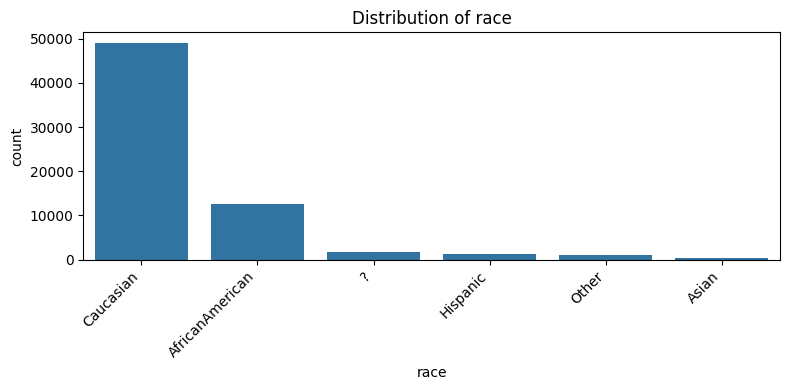


📊 Distribution for 'glipizide':
           Count  Percent
glipizide                
No         58265    87.99
Steady      7123    10.76
Up           484     0.73
Down         349     0.53


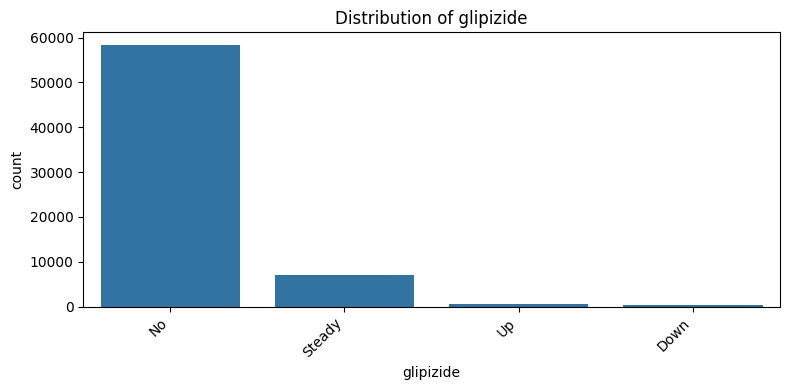


📊 Distribution for 'troglitazone':
              Count  Percent
troglitazone                
No            66220    100.0
Steady            1      0.0


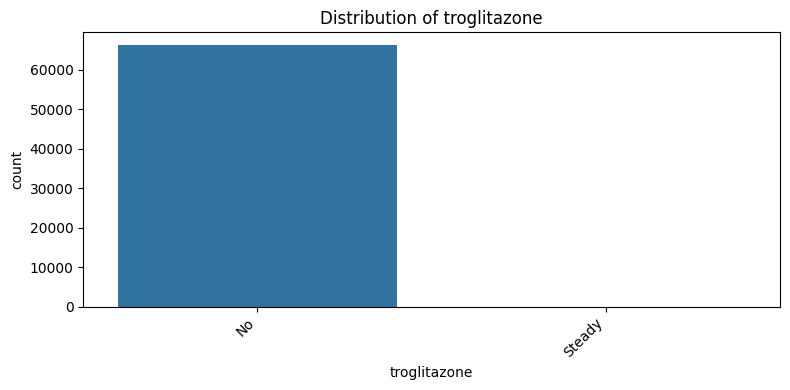


📊 Distribution for 'rosiglitazone':
               Count  Percent
rosiglitazone                
No             62265    94.03
Steady          3765     5.69
Up               126     0.19
Down              65     0.10


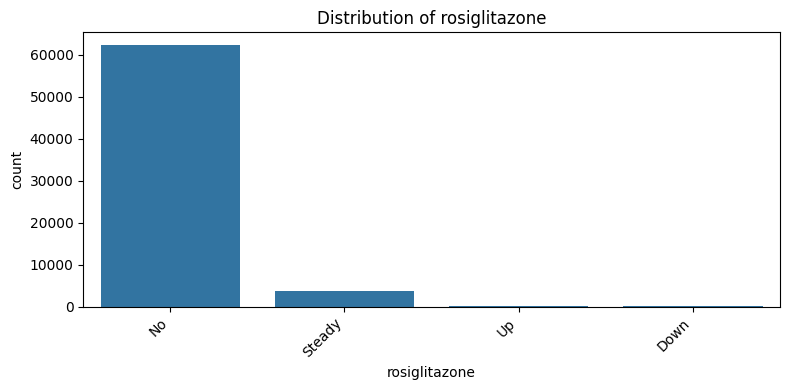


📊 Distribution for 'glimepiride-pioglitazone':
                          Count  Percent
glimepiride-pioglitazone                
No                        66221    100.0
Steady                        0      0.0


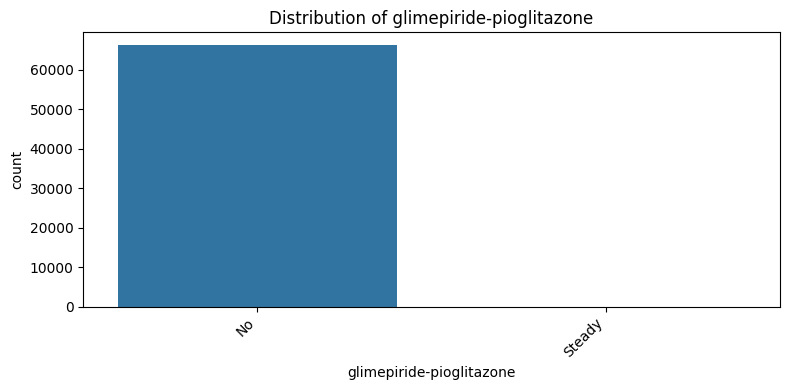


📊 Distribution for 'metformin':
           Count  Percent
metformin                
No         52939    79.94
Steady     12177    18.39
Up           720     1.09
Down         385     0.58


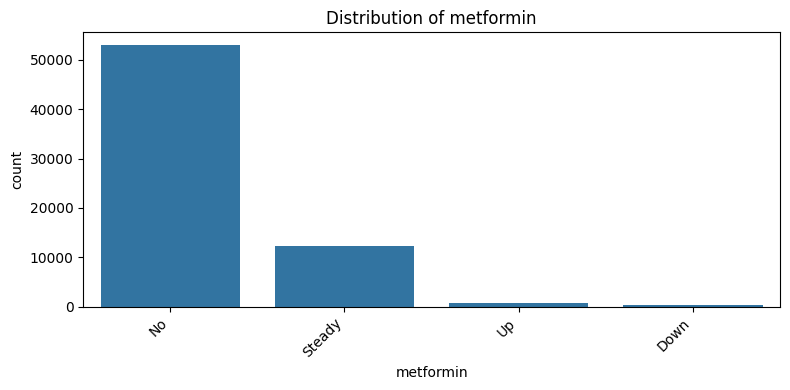


🟥 HIGH CARDINALITY CATEGORICAL VARIABLES (TOP 10 + OTHERS)


📊 Top 10 Categories for 'diag_1' (Others Grouped):
        Count  Percent
diag_1                
Other   43334    65.44
414      4456     6.73
428      3773     5.70
786      2598     3.92
410      2549     3.85
486      2139     3.23
427      1792     2.71
715      1583     2.39
434      1440     2.17
780      1289     1.95
682      1268     1.91


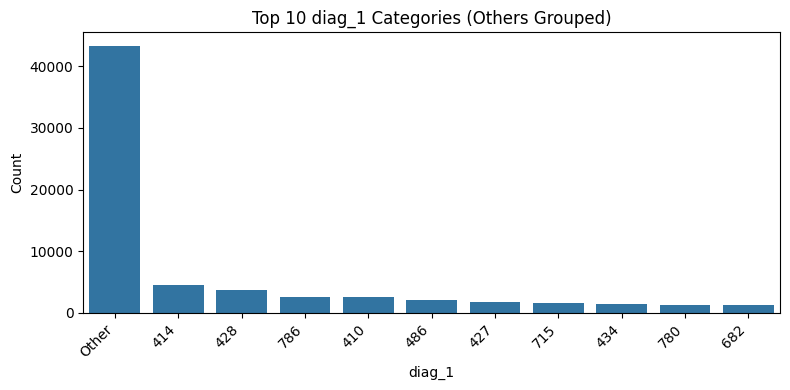


📊 Top 10 Categories for 'diag_2' (Others Grouped):
        Count  Percent
diag_2                
Other   38560    58.23
250      4391     6.63
276      4360     6.58
428      3982     6.01
427      3207     4.84
401      2701     4.08
599      2125     3.21
496      1964     2.97
414      1751     2.64
411      1643     2.48
403      1537     2.32


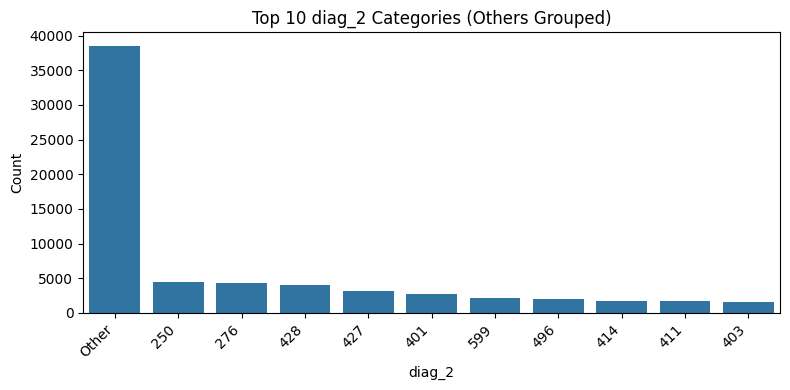


📊 Top 10 Categories for 'diag_3' (Others Grouped):
        Count  Percent
diag_3                
Other   35946    54.28
250      7989    12.06
401      5804     8.76
276      3384     5.11
428      2705     4.08
427      2451     3.70
414      2313     3.49
496      1606     2.43
272      1407     2.12
403      1370     2.07
599      1246     1.88


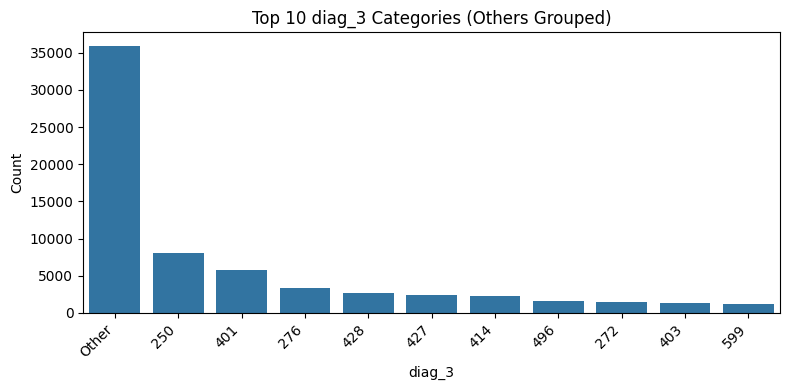


📊 Top 10 Categories for 'medical_specialty' (Others Grouped):
                            Count  Percent
medical_specialty                         
?                           31733    47.92
InternalMedicine             9912    14.97
Other                        5971     9.02
Family/GeneralPractice       4777     7.21
Emergency/Trauma             4559     6.88
Cardiology                   3499     5.28
Surgery-General              2053     3.10
Orthopedics                  1073     1.62
Nephrology                    947     1.43
Orthopedics-Reconstructive    940     1.42
Radiologist                   757     1.14


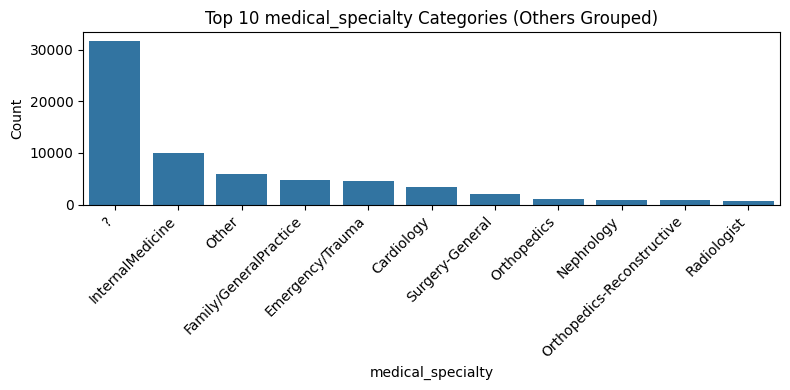

In [51]:
# Step 2: Define high-cardinality columns
high_card_cols = ['diag_1', 'diag_2', 'diag_3', 'medical_specialty']
top_n = 10

# Step 3: Create low-cardinality list by excluding high-cardinality ones
low_card_cols = [col for col in cat_cols if col not in high_card_cols]

# -------------------- LOW CARDINALITY DISTRIBUTIONS --------------------
print("\n🟩 LOW CARDINALITY CATEGORICAL VARIABLES\n")
for col in low_card_cols:
    print(f"\n📊 Distribution for '{col}':")
    dist = df_option2[col].value_counts(dropna=False)
    percent = df_option2[col].value_counts(normalize=True, dropna=False) * 100
    distribution = pd.DataFrame({'Count': dist, 'Percent': percent.round(2)})
    print(distribution)

    # Bar plot
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_option2, x=col, order=dist.index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# -------------------- HIGH CARDINALITY DISTRIBUTIONS --------------------
print("\n🟥 HIGH CARDINALITY CATEGORICAL VARIABLES (TOP 10 + OTHERS)\n")
for col in high_card_cols:
    print(f"\n📊 Top {top_n} Categories for '{col}' (Others Grouped):")

    top_categories = df_option2[col].value_counts().nlargest(top_n).index
    temp_col = df_option2[col].apply(lambda x: x if x in top_categories else 'Other')

    dist = temp_col.value_counts()
    percent = temp_col.value_counts(normalize=True) * 100
    distribution = pd.DataFrame({'Count': dist, 'Percent': percent.round(2)})
    print(distribution)

    plt.figure(figsize=(8, 4))
    sns.countplot(x=temp_col, order=distribution.index)
    plt.title(f"Top {top_n} {col} Categories (Others Grouped)")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## Analyse

In [52]:
for col in ['examide', 'acetohexamide', 'glimepiride-pioglitazone']:
    unique_vals = df_option2[col].unique()
    print(f"{col}: {unique_vals}")

examide: ['No']
Categories (1, object): ['No']
acetohexamide: ['No']
Categories (2, object): ['No', 'Steady']
glimepiride-pioglitazone: ['No']
Categories (2, object): ['No', 'Steady']


By analysing these I found out that examide, acetohexamide, and glimepiride-pioglitazone variables has only one unique value (in this case, 'No'. so i am dropping these variables

In [53]:
df_option2.drop(columns=['examide', 'acetohexamide', 'glimepiride-pioglitazone'], inplace=True)


# Distribution of Numerical Variables

In [54]:
print(df_option2.dtypes)

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
glipizide                   category
g

In [55]:
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]


In [56]:
# Preview summary stats to guide binning
for col in numeric_cols:
    col_data = df_option2[col].dropna()
    unique_vals = col_data.nunique()
    min_val = col_data.min()
    max_val = col_data.max()
    print(f"{col}: min={min_val}, max={max_val}, unique={unique_vals}")


time_in_hospital: min=1, max=14, unique=14
num_lab_procedures: min=1, max=132, unique=116
num_procedures: min=0, max=6, unique=7
num_medications: min=1, max=81, unique=75
number_outpatient: min=0, max=40, unique=31
number_emergency: min=0, max=64, unique=26
number_inpatient: min=0, max=21, unique=20
number_diagnoses: min=1, max=16, unique=16


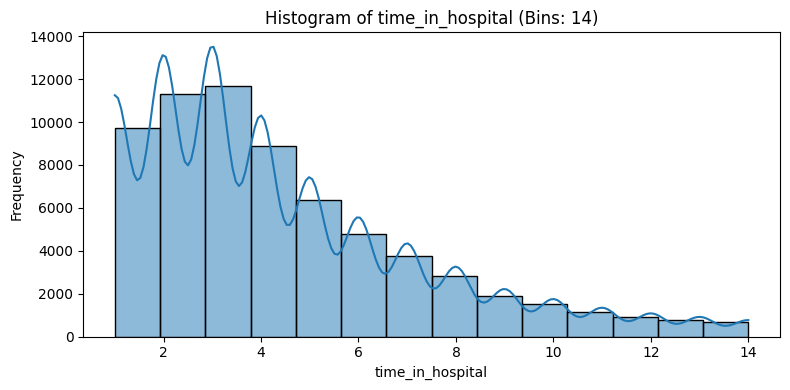

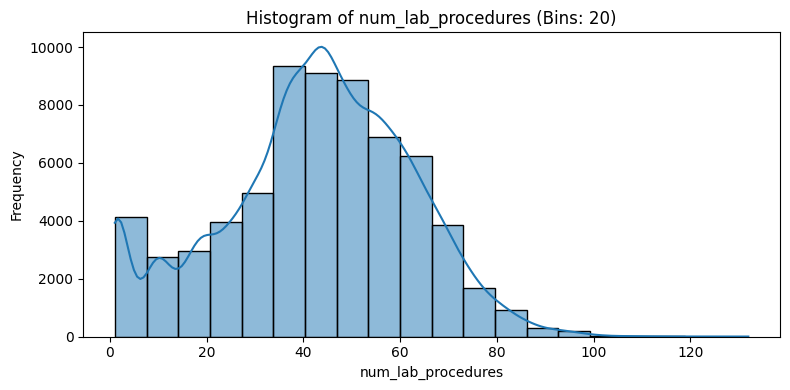

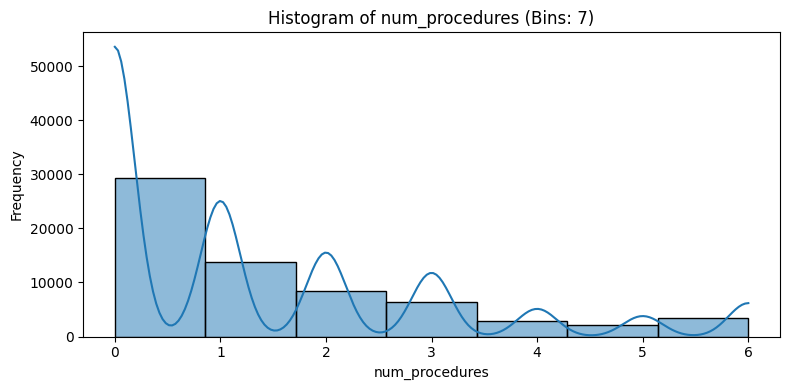

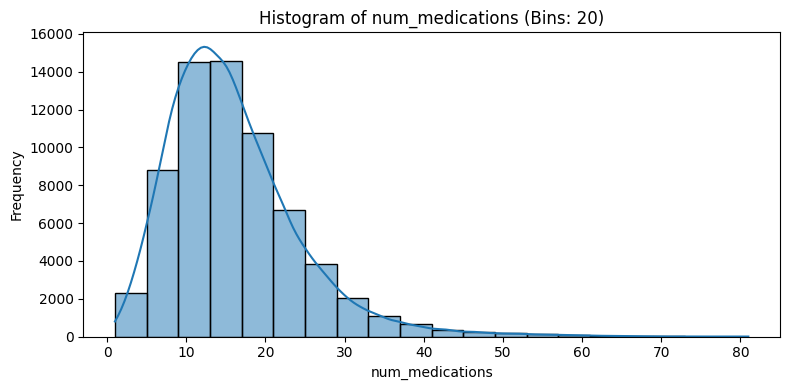

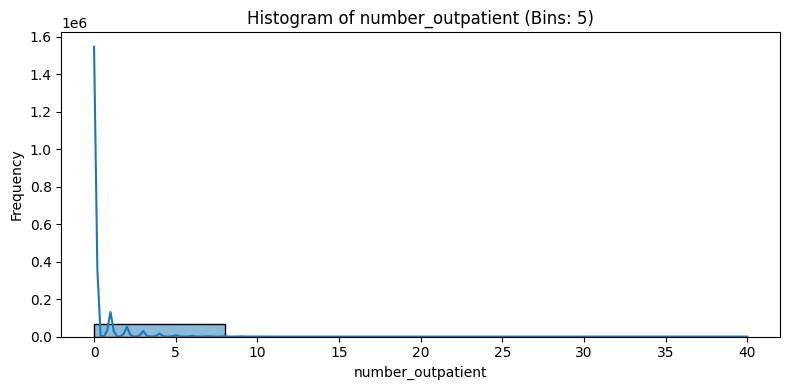

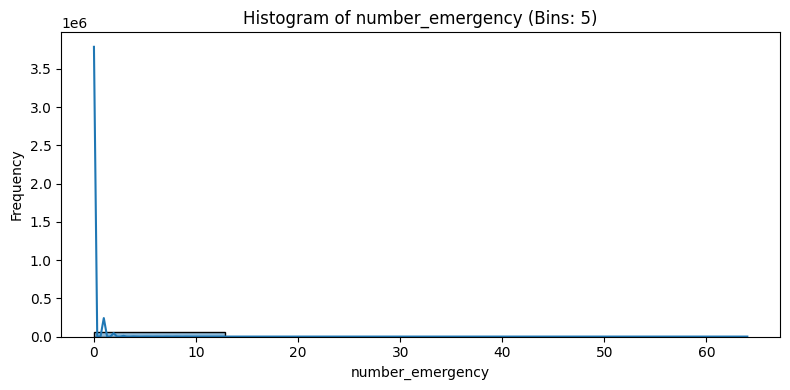

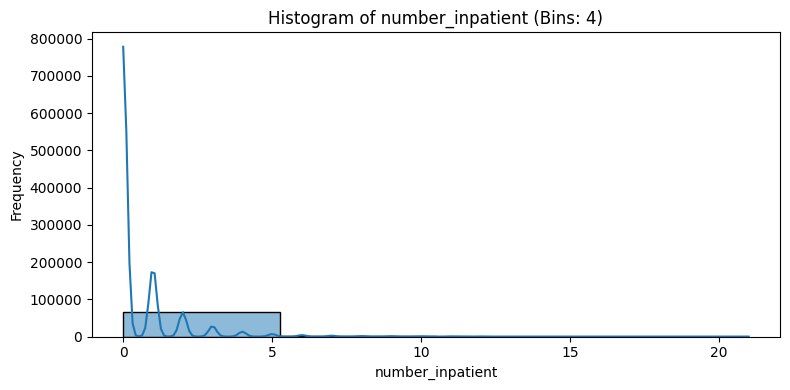

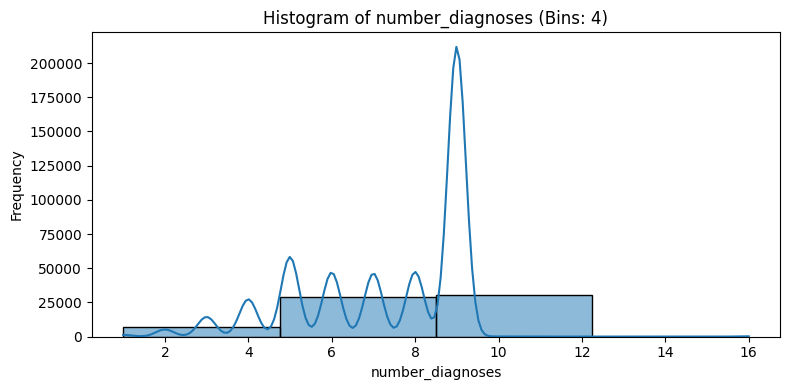

In [57]:
bin_settings = {
    'time_in_hospital': 14,
    'num_lab_procedures': 20,
    'num_procedures': 7,
    'num_medications': 20,
    'number_outpatient': 5,
    'number_emergency': 5,
    'number_inpatient': 4,
    'number_diagnoses':4
}

# Plot with specified bins
for col in numeric_cols:
    bins = bin_settings.get(col, 30)
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_option2, x=col, bins=bins, kde=True)
    plt.title(f"Histogram of {col} (Bins: {bins})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# Correlation and Heatmap

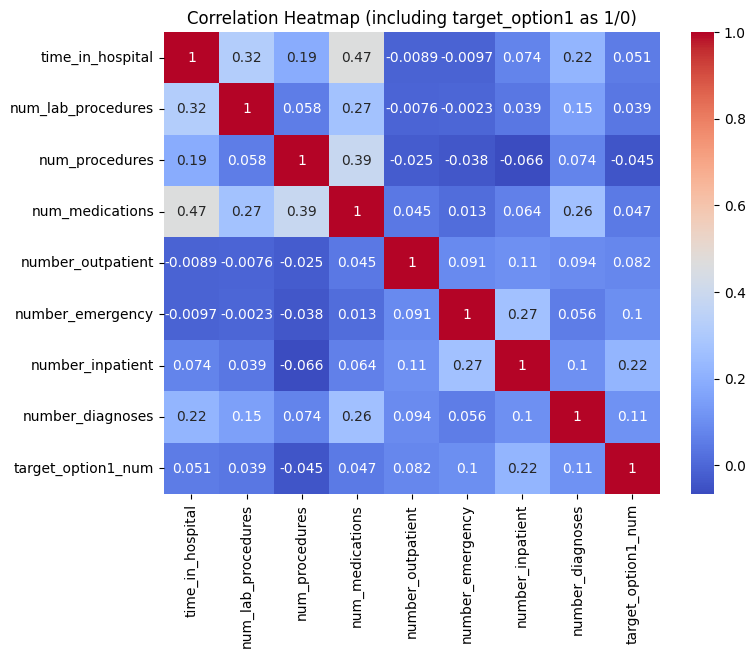

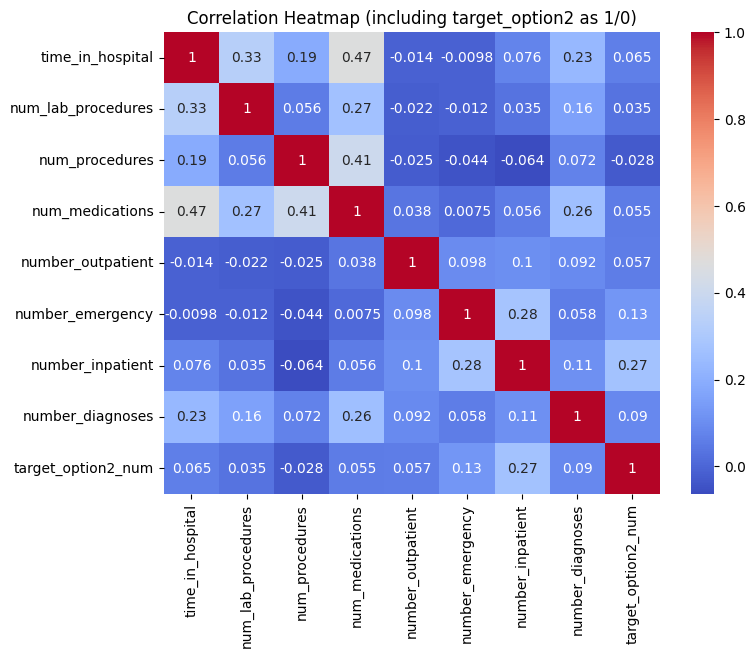

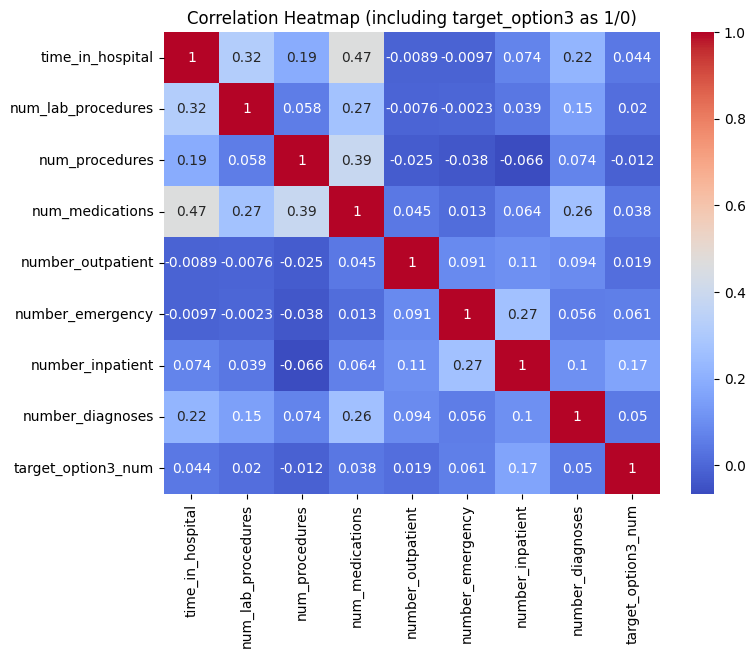

In [58]:

numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

for opt in ['target_option1', 'target_option2', 'target_option3']:
    if opt == 'target_option2':
        df_corr = df_option2.copy()
    else:
        df_corr = df.copy()
    df_corr[f'{opt}_num'] = (df_corr[opt] == 'Yes').astype(int)
    cols_for_corr = numeric_cols + [f'{opt}_num']
    corr_matrix = df_corr[cols_for_corr].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap (including {opt} as 1/0)')
    plt.show()


**No evidence of problematic multicollinearity (no pairs >0.7 or <-0.7).**

# Chi-Square

In [59]:
# Step 1: Get categorical columns
cat_cols_set = set(cat_cols + ['diag_1', 'diag_2', 'diag_3', 'medical_specialty'])
cat_cols_clean = [col for col in cat_cols_set if col in df_option2.columns]

# Step 2: Count '?' in categorical columns
missing_summary_cat = df_option2[cat_cols_clean].isin(['?']).sum().to_frame(name='missing_count')

# Step 3: Add percentage
missing_summary_cat['missing_percent'] = (missing_summary_cat['missing_count'] / len(df_option2) * 100).round(2)

# Step 4: Format the output
missing_summary_cat = missing_summary_cat.reset_index().rename(columns={'index': 'column'})
missing_summary_cat = missing_summary_cat.sort_values(by='missing_count', ascending=False)

# Step 5: Show result
print("'?'-style Missing Summary for Categorical Variables:")
print(missing_summary_cat)


'?'-style Missing Summary for Categorical Variables:
                      column  missing_count  missing_percent
25         medical_specialty          31733            47.92
11                payer_code          26428            39.91
30                      race           1735             2.62
17                    diag_3           1085             1.64
4                     diag_2            284             0.43
6                     diag_1             17             0.03
0                nateglinide              0             0.00
2        glyburide-metformin              0             0.00
1             chlorpropamide              0             0.00
7                 tolazamide              0             0.00
8               pioglitazone              0             0.00
10                       age              0             0.00
9                citoglipton              0             0.00
13               repaglinide              0             0.00
12    metformin-pioglitazone    

In [60]:
df_option2['max_glu_serum'] = df_option2['max_glu_serum'].fillna('None')
df_option2['A1Cresult'] = df_option2['A1Cresult'].fillna('None')


## Imputing

***medical_specialty (47%) & payer_code (40%) have high missingness — replacing with 'Unknown'/'Missing' avoids bias and preserves information about absence.***

**race has low missingness (2.6%) — mode imputation**

**diag_1/2/3 are diagnosis codes — imputing with 'Unknown' avoids inserting incorrect medical labels.**

In [61]:
# Replace '?' with appropriate values as per missing % and business logic

# 1. Replace '?' with 'Unknown' in medical_specialty
df_option2['medical_specialty'] = df_option2['medical_specialty'].replace('?', 'Unknown')

# 2. Replace '?' with 'Missing' in payer_code
df_option2['payer_code'] = df_option2['payer_code'].replace('?', 'Missing')

# 3. Replace '?' in race with mode
most_common_race = df_option2['race'].mode()[0]
df_option2['race'] = df_option2['race'].replace('?', most_common_race)

# 4. Replace '?' with 'Unknown' in diag_1, diag_2, diag_3
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_option2[col] = df_option2[col].replace('?', 'Unknown')


/tmp/ipython-input-61-2143163198.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_option2['medical_specialty'] = df_option2['medical_specialty'].replace('?', 'Unknown')
/tmp/ipython-input-61-2143163198.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_option2['payer_code'] = df_option2['payer_code'].replace('?', 'Missing')
/tmp/ipython-input-61-2143163198.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. 

In [62]:
print("Remaining '?' values after imputation:")
print((df_option2[['medical_specialty', 'payer_code', 'race', 'diag_1', 'diag_2', 'diag_3']] == '?').sum())


Remaining '?' values after imputation:
medical_specialty    0
payer_code           0
race                 0
diag_1               0
diag_2               0
diag_3               0
dtype: int64


In [63]:
from scipy.stats import chi2_contingency
import pandas as pd

# Full list of categorical columns (after cleaning)
cat_cols_for_chi2 = [
    'age', 'gender', 'race', 'admission_type_id', 'discharge_disposition_id', 'payer_code', 'medical_specialty',
    'diag_1', 'diag_2', 'diag_3', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
    'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Ensure columns exist in df_option2
cat_cols_for_chi2 = [col for col in cat_cols_for_chi2 if col in df_option2.columns]

# Run chi-square test
chi2_results = []

for col in cat_cols_for_chi2:
    if df_option2[col].nunique() > 1:  # skip constant columns
        contingency = pd.crosstab(df_option2[col], df_option2['target_option2'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append({
            'Variable': col,
            'Chi2': round(chi2, 2),
            'p-value': round(p, 4),
            'Significant (p < 0.05)': '✅' if p < 0.05 else '❌'
        })

# Create DataFrame of results
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')
print("🧪 Chi-square Test Results (vs target_option2):")
print(chi2_df)


🧪 Chi-square Test Results (vs target_option2):
                    Variable     Chi2  p-value Significant (p < 0.05)
0                        age   158.16   0.0000                      ✅
3          admission_type_id    80.76   0.0000                      ✅
5                 payer_code   178.24   0.0000                      ✅
4   discharge_disposition_id  1643.05   0.0000                      ✅
6          medical_specialty   503.03   0.0000                      ✅
7                     diag_1  2189.52   0.0000                      ✅
9                     diag_3  1972.94   0.0000                      ✅
8                     diag_2  1794.61   0.0000                      ✅
12                 A1Cresult    48.22   0.0000                      ✅
13                    change    89.80   0.0000                      ✅
10       admission_source_id   201.62   0.0000                      ✅
11             max_glu_serum    31.16   0.0000                      ✅
14               diabetesMed   160.32   0.0

In [65]:
#created new df to track
df_option2_chi=df_option2

# **Outliers**

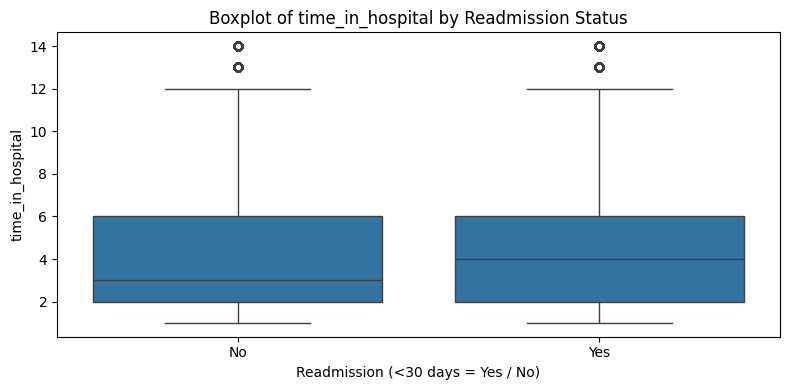

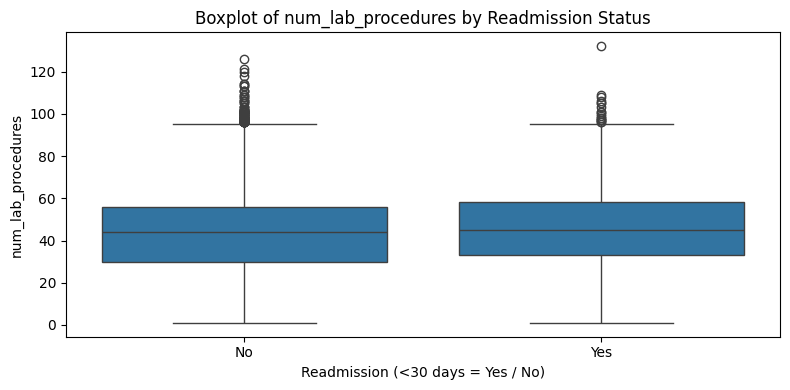

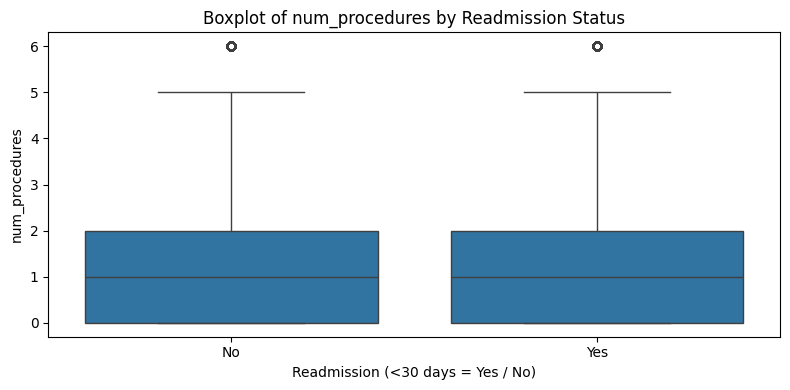

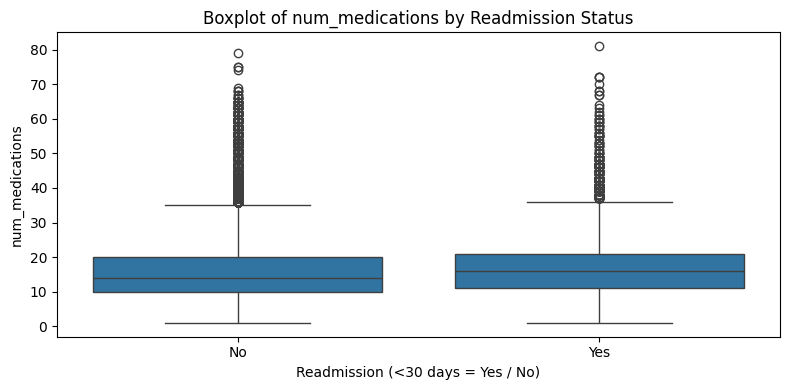

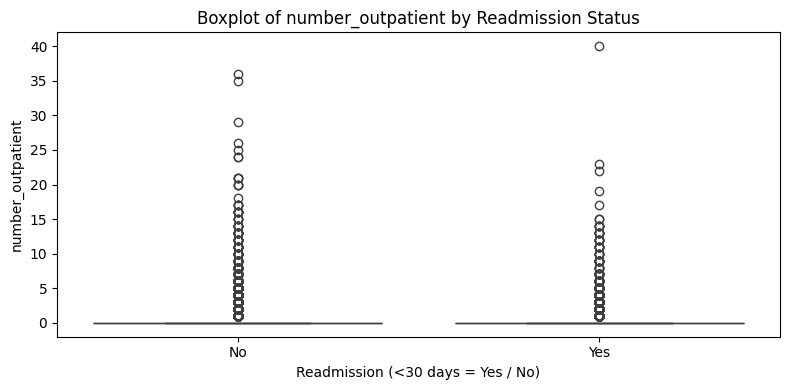

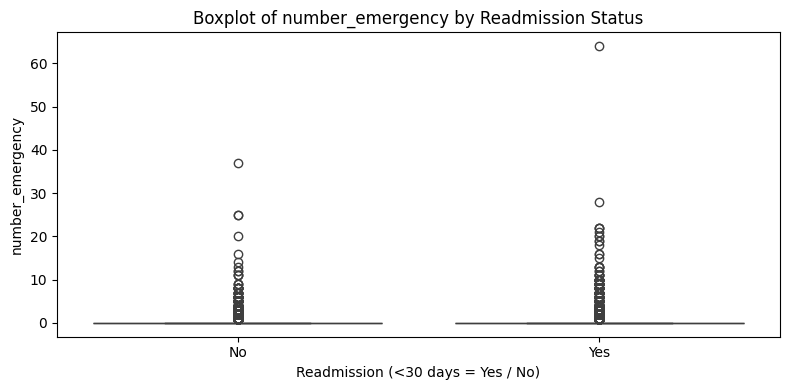

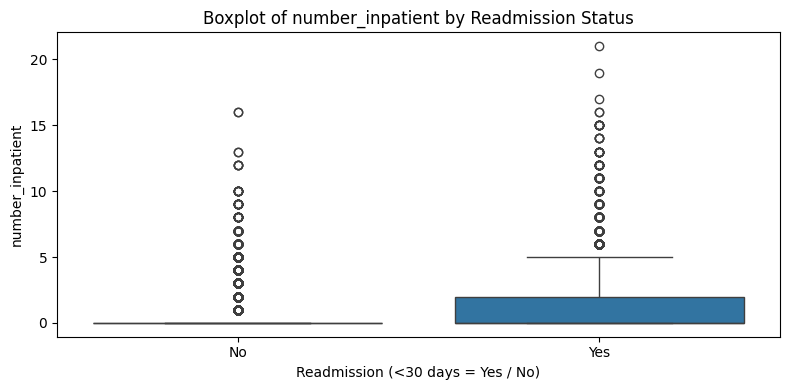

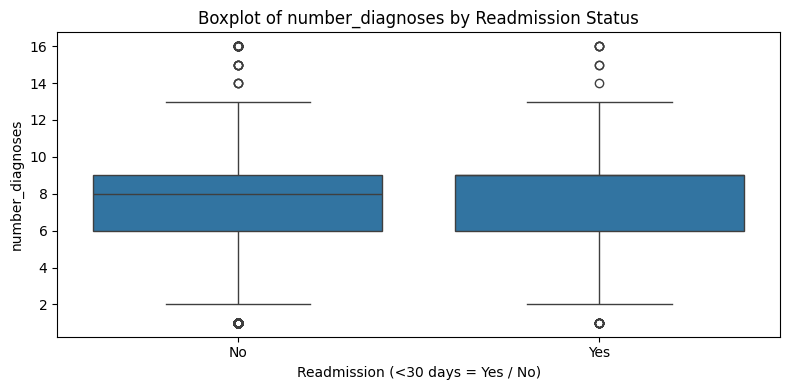

In [66]:
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
# Plot boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_option2, x='target_option2', y=col)
    plt.title(f'Boxplot of {col} by Readmission Status')
    plt.xlabel('Readmission (<30 days = Yes / No)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [67]:
summary_stats_2 = []

for col in numeric_cols:
    # Group summary by target
    stats = df_option2.groupby('target_option2')[col].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

    # IQR calculation for full column (not by group)
    Q1 = df_option2[col].quantile(0.25)
    Q3 = df_option2[col].quantile(0.75)
    IQR = Q3 - Q1

    # Outlier detection
    outliers = ((df_option2[col] < (Q1 - 1.5 * IQR)) | (df_option2[col] > (Q3 + 1.5 * IQR))).sum()

    # Add outlier count and feature name
    stats['outliers'] = outliers
    stats['feature'] = col

    summary_stats_2.append(stats)

# Combine into one summary DataFrame
summary_df_2 = pd.concat(summary_stats_2, keys=numeric_cols)

print("📊 Option 2 Summary (Numeric Stats + Outliers):")
print(summary_df_2)


📊 Option 2 Summary (Numeric Stats + Outliers):
                                   count       mean  median  min  max        std  outliers             feature
                   target_option2                                                                             
time_in_hospital   No              54864   4.254429     3.0    1   14   2.964964      1453    time_in_hospital
                   Yes             11357   4.768249     4.0    1   14   3.028165      1453    time_in_hospital
num_lab_procedures No              54864  42.381598    44.0    1  126  19.796262       190  num_lab_procedures
                   Yes             11357  44.226028    45.0    1  132  19.276087       190  num_lab_procedures
num_procedures     No              54864   1.410305     1.0    0    6   1.739693      3384      num_procedures
                   Yes             11357   1.280884     1.0    0    6   1.635992      3384      num_procedures
num_medications    No              54864  15.670367    14.0    1 

**Outliers (very high values) are found commonly in several features, especially for outpatient, emergency, and inpatient visits. This is typical in hospital data where a small group of patients have much more frequent hospital use, I will handle outliers after running decision tree.**

# Grouping

In [68]:
# Quick look at the data
print(df_option2.shape)
print(df_option2.head())
print(df_option2.dtypes)

(66221, 45)
              race  gender      age admission_type_id discharge_disposition_id admission_source_id  time_in_hospital payer_code         medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1   diag_2   diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide citoglipton insulin glyburide-metformin glipizide-metformin metformin-rosiglitazone metformin-pioglitazone change diabetesMed target_option2  weight_missing
0        Caucasian  Female   [0-10)                 6                       25                   1                 1    Missing  Pediatrics-Endocrinology                  41               0                1                  0                 0                 0  250.83  Unknown  Unknown                 1          None      None        No

admission_type_id	Description

1	Emergency

2	Urgent

3	Elective

4	Newborn

5	Not Available

6	NULL

7	Trauma Center

8	Not Mapped

In [69]:
admission_type_stats = df_option2.copy()
admission_type_stats['target_option2_numeric'] = (admission_type_stats['target_option2'] == 'Yes').astype(int)
admission_type_stats = admission_type_stats.groupby('admission_type_id')['target_option2_numeric'].agg(['count', 'mean']).reset_index()
admission_type_stats.columns = ['admission_type_id', 'count', 'readmission_rate']
print(admission_type_stats)

  admission_type_id  count  readmission_rate
0                 1  34681          0.179378
1                 2  12028          0.171766
2                 3  13123          0.149432
3                 4      8          0.125000
4                 5   3064          0.161554
5                 6   3060          0.191503
6                 7     21          0.000000
7                 8    236          0.114407


/tmp/ipython-input-69-447029859.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  admission_type_stats = admission_type_stats.groupby('admission_type_id')['target_option2_numeric'].agg(['count', 'mean']).reset_index()


In [70]:
admission_map = {
    1: 'Emergency_Urgent',
    2: 'Emergency_Urgent',
    3: 'Elective',
    4: 'Others',
    5: 'Unknown',
    6: 'Unknown',
    7: 'Others',
    8: 'Unknown'
}

df_option2['admission_type_grouped'] = df_option2['admission_type_id'].map(admission_map)


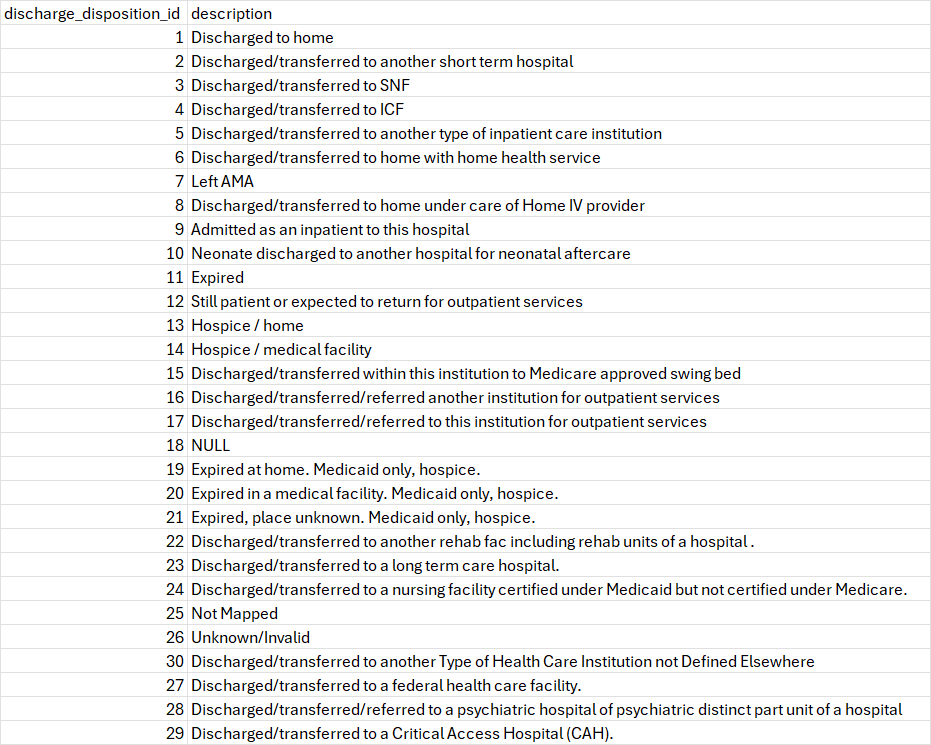

In [71]:
discharge_stats = df_option2.copy()
discharge_stats['target_option2_numeric'] = (discharge_stats['target_option2'] == 'Yes').astype(int)
discharge_stats = discharge_stats.groupby('discharge_disposition_id')['target_option2_numeric'].agg(['count', 'mean']).reset_index()
discharge_stats.columns = ['discharge_disposition_id', 'count', 'readmission_rate']
print(discharge_stats.sort_values('count', ascending=False))

   discharge_disposition_id  count  readmission_rate
0                         1  38717          0.144691
2                         3   9038          0.226378
5                         6   7540          0.217241
17                       18   2664          0.172297
10                       11   1642          0.000000
20                       22   1474          0.374491
1                         2   1460          0.234247
4                         5    834          0.296163
23                       25    613          0.150082
3                         4    537          0.193669
6                         7    402          0.223881
13                       14    365          0.065753
12                       13    363          0.052342
21                       23    268          0.111940
25                       28    105          0.485714
7                         8     70          0.214286
14                       15     45          0.622222
22                       24     32          0.

/tmp/ipython-input-71-3797782094.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discharge_stats = discharge_stats.groupby('discharge_disposition_id')['target_option2_numeric'].agg(['count', 'mean']).reset_index()


In [72]:
# Map discharge groups again with full mapping
discharge_group_map = {
    1: 'Home', 6: 'Home', 8: 'Home',
    2: 'Transfer/Facility', 3: 'Transfer/Facility', 4: 'Transfer/Facility',
    5: 'Transfer/Facility', 15: 'Transfer/Facility', 22: 'Transfer/Facility',
    23: 'Transfer/Facility', 24: 'Transfer/Facility', 27: 'Transfer/Facility',
    11: 'Expired', 13: 'Hospice', 14: 'Hospice',
    19: 'Expired', 20: 'Expired',
    12: 'Outpatient Followup', 16: 'Outpatient Followup',
    17: 'Outpatient Followup', 25: 'Unknown',
    7: 'Left AMA',
    9: 'Other', 10: 'Other', 18: 'Unknown',
    26: 'Unknown', 28: 'Transfer/Facility', 29: 'Transfer/Facility'
}

# Apply mapping
df_option2['discharge_group'] = df_option2['discharge_disposition_id'].map(discharge_group_map).fillna('Other/Unknown')


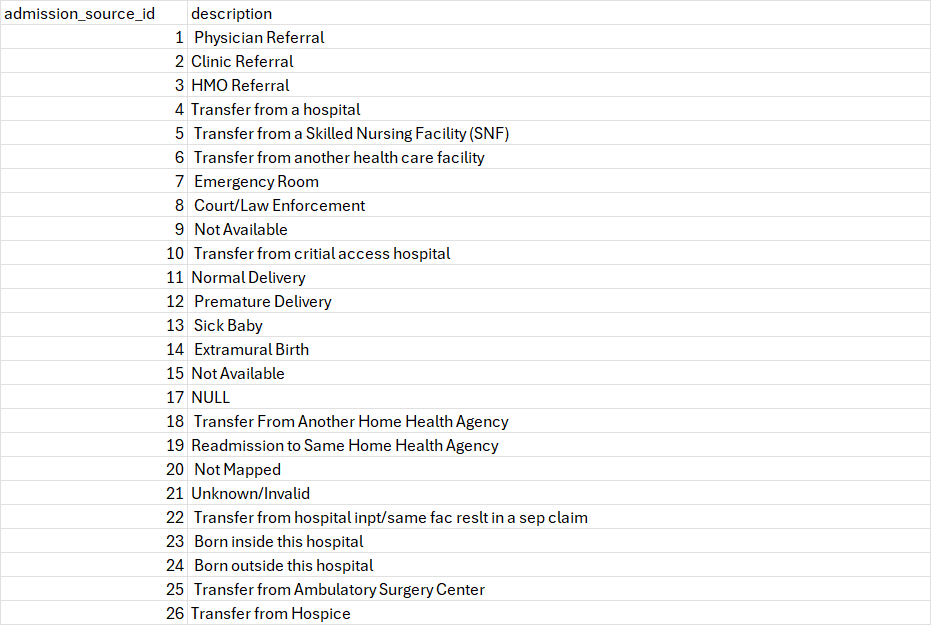

In [73]:
admission_src_stats = (
    df_option2
    .groupby('admission_source_id')
    .agg(count=('target_option2', 'count'),
         readmission_rate=('target_option2', lambda x: (x == 'Yes').mean()))
    .reset_index()
    .sort_values(by='count', ascending=False)
)

print(admission_src_stats)


   admission_source_id  count  readmission_rate
6                    7  35827          0.187568
0                    1  19925          0.157089
13                  17   4323          0.163313
3                    4   2515          0.122863
5                    6   1866          0.113612
1                    2    794          0.139798
4                    5    619          0.163166
2                    3    129          0.224806
8                    9    109          0.119266
14                  20     80          0.275000
7                    8     12          0.166667
15                  22      9          0.222222
9                   10      6          0.000000
10                  11      2          0.000000
12                  14      2          0.000000
16                  25      2          0.000000
11                  13      1          0.000000


/tmp/ipython-input-73-1428722759.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('admission_source_id')


In [74]:
admission_source_map = {
    1: 'Referral',
    2: 'Referral',
    3: 'Referral',
    4: 'Transfer',
    5: 'Transfer',
    6: 'Transfer',
    7: 'Emergency',
    8: 'Others',
    9: 'Others',
    10: 'Transfer',
    11: 'Newborn/Birth',
    13: 'Newborn/Birth',
    14: 'Newborn/Birth',
    17: 'Others',
    20: 'Others',
    22: 'Transfer',
    25: 'Transfer',
}

df_option2['admission_source_grouped'] = df_option2['admission_source_id'].map(admission_source_map).fillna('Unknown')


https://en.wikipedia.org/wiki/List_of_ICD-9_codes

In [75]:
# Step 1: ICD-9 grouping function
def group_icd9(code):
    try:
        code = str(code)
        if code.startswith('V'):
            return 'Other_V'
        elif code.startswith('E'):
            return 'Other_E'
        code = float(code)
        if 390 <= code <= 459:
            return 'Circulatory'
        elif 460 <= code <= 519:
            return 'Respiratory'
        elif 520 <= code <= 579:
            return 'Digestive'
        elif 250 <= code < 251:
            return 'Diabetes'
        elif 580 <= code <= 629:
            return 'Genitourinary'
        elif 800 <= code <= 999:
            return 'Injury'
        elif 290 <= code <= 319:
            return 'Mental_Disorders'
        elif 710 <= code <= 739:
            return 'Musculoskeletal'
        elif 140 <= code <= 239:
            return 'Neoplasms'
        elif 320 <= code <= 389:
            return 'Nervous_System'
        elif 280 <= code <= 289:
            return 'Blood_Diseases'
        elif 240 <= code <= 279:
            return 'Endocrine_Other'
        elif 1 <= code <= 139:
            return 'Infectious'
        elif 780 <= code <= 799:
            return 'Symptoms'
        elif 0 <= code <= 0:
            return 'Unknown'
        else:
            return 'Other'
    except:
        return 'Unknown'


# Step 2: Apply grouping to diag_1, diag_2, diag_3 in df_option2
df_option2['diag_1_group'] = df_option2['diag_1'].apply(group_icd9)
df_option2['diag_2_group'] = df_option2['diag_2'].apply(group_icd9)
df_option2['diag_3_group'] = df_option2['diag_3'].apply(group_icd9)

In [76]:
df_option2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target_option2,weight_missing,admission_type_grouped,discharge_group,admission_source_grouped,diag_1_group,diag_2_group,diag_3_group
0,Caucasian,Female,[0-10),6,25,1,1,Missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Unknown,Unknown,Referral,Diabetes,Unknown,Unknown
2,AfricanAmerican,Female,[20-30),1,1,7,2,Missing,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,0,Emergency_Urgent,Home,Emergency,Other,Diabetes,Other_V
3,Caucasian,Male,[30-40),1,1,7,2,Missing,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,No,0,Emergency_Urgent,Home,Emergency,Infectious,Diabetes,Circulatory
4,Caucasian,Male,[40-50),1,1,7,1,Missing,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,No,0,Emergency_Urgent,Home,Emergency,Neoplasms,Neoplasms,Diabetes
6,Caucasian,Male,[60-70),3,1,2,4,Missing,Unknown,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,No,0,Elective,Home,Referral,Circulatory,Circulatory,Other_V


Grouping medical_specialty column

In [77]:
# Count how many unique values
unique_specialties = df_option2['medical_specialty'].nunique()
print(f"🔍 Number of unique medical specialties: {unique_specialties}")

# Display all unique values sorted by frequency
print("\n📊 Value counts of medical_specialty:")
print(df_option2['medical_specialty'].value_counts(dropna=False))


🔍 Number of unique medical specialties: 68

📊 Value counts of medical_specialty:
medical_specialty
Unknown                                 31733
InternalMedicine                         9912
Family/GeneralPractice                   4777
Emergency/Trauma                         4559
Cardiology                               3499
Surgery-General                          2053
Orthopedics                              1073
Nephrology                                947
Orthopedics-Reconstructive                940
Radiologist                               757
Psychiatry                                592
ObstetricsandGynecology                   561
Pulmonology                               543
Surgery-Cardiovascular/Thoracic           522
Urology                                   500
Surgery-Neuro                             392
Gastroenterology                          350
Surgery-Vascular                          333
PhysicalMedicineandRehabilitation         297
Oncology                   

| **Group**                   | **Specialties Included**                                                                                                                                                                                                                                                                                                      |
| --------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Unknown**                 | Unknown, (empty string), (missing/NaN)                                                                                                                                                                                                                                                                                        |
| **General Practice**        | InternalMedicine, Family/GeneralPractice, Hospitalist, Osteopath, PhysicianNotFound, Resident                                                                                                                                                                                                                                 |
| **Emergency/Trauma**        | Emergency/Trauma, Pediatrics-EmergencyMedicine                                                                                                                                                                                                                                                                                |
| **Orthopedics**             | Orthopedics, Orthopedics-Reconstructive                                                                                                                                                                                                                                                                                       |
| **Surgery**                 | Surgery-General, Surgery-Cardiovascular/Thoracic, Surgery-Vascular, Surgery-Neuro, Surgery-Thoracic, Surgeon, Surgery-Plastic, Surgery-Colon\&Rectal, Surgery-Maxillofacial, Surgery-Pediatric, SurgicalSpecialty, Surgery-PlasticwithinHeadandNeck, Proctology                                                               |
| **Medicine Subspecialty**   | Cardiology, Cardiology-Pediatric, Gastroenterology, Nephrology, Pulmonology, Neurology, Hematology, Hematology/Oncology, Oncology, Endocrinology, Endocrinology-Metabolism, InfectiousDiseases, Rheumatology, AllergyandImmunology, Dermatology, Ophthalmology, Otolaryngology, SportsMedicine, Neurophysiology, Perinatology |
| **Obstetrics & Gynecology** | ObstetricsandGynecology, Gynecology, Obstetrics, Obsterics\&Gynecology-GynecologicOnco                                                                                                                                                                                                                                        |
| **Pediatrics**              | Pediatrics, Pediatrics-Endocrinology, Pediatrics-CriticalCare, Pediatrics-Pulmonology, Pediatrics-Neurology, Pediatrics-Hematology-Oncology, Pediatrics-AllergyandImmunology, Pediatrics-InfectiousDiseases                                                                                                                   |
| **Psychiatry/Psychology**   | Psychiatry, Psychiatry-Child/Adolescent, Psychiatry-Addictive, Psychology                                                                                                                                                                                                                                                     |
| **Anesthesiology/Pain**     | Anesthesiology, Anesthesiology-Pediatric                                                                                                                                                                                                                                                                                      |
| **Radiology/Pathology**     | Radiologist, Radiology, Pathology, DCPTEAM                                                                                                                                                                                                                                                                                    |
| **Rehabilitation**          | PhysicalMedicineandRehabilitation                                                                                                                                                                                                                                                                                             |
| **Other**                   | Dentistry, Podiatry, Speech, OutreachServices, and any other specialty not explicitly listed above                                                                                                                                                                                                                            |


In [78]:
def group_medical_specialty(specialty):
    if pd.isnull(specialty) or specialty.strip().lower() in ['unknown', '']:
        return 'Unknown'
    s = specialty.strip().lower()

    # General Practice / Primary Care
    if s in ['internalmedicine', 'family/generalpractice', 'hospitalist', 'osteopath', 'physiciannotfound', 'resident']:
        return 'General Practice'
    # Emergency / Trauma
    elif s in ['emergency/trauma', 'pediatrics-emergencymedicine']:
        return 'Emergency/Trauma'
    # Orthopedics
    elif s in ['orthopedics', 'orthopedics-reconstructive']:
        return 'Orthopedics'
    # Surgery (excluding Orthopedics)
    elif s in [
        'surgery-general', 'surgery-cardiovascular/thoracic', 'surgery-vascular', 'surgery-neuro', 'surgery-thoracic',
        'surgeon', 'surgery-plastic', 'surgery-colon&rectal', 'surgery-maxillofacial', 'surgery-pediatric',
        'surgicalspecialty', 'surgery-plasticwithinheadandneck', 'proctology'
    ]:
        return 'Surgery'
    # Medicine Subspecialties
    elif s in [
        'cardiology', 'cardiology-pediatric', 'gastroenterology', 'nephrology', 'pulmonology', 'neurology',
        'hematology', 'hematology/oncology', 'oncology', 'endocrinology', 'endocrinology-metabolism',
        'infectiousdiseases', 'rheumatology', 'allergyandimmunology', 'dermatology', 'ophthalmology', 'otolaryngology',
        'sportsmedicine', 'neurophysiology', 'perinatology'
    ]:
        return 'Medicine Subspecialty'
    # Obstetrics & Gynecology
    elif s in [
        'obstetricsandgynecology', 'gynecology', 'obstetrics', 'obsterics&gynecology-gynecologiconco'
    ]:
        return 'Obstetrics & Gynecology'
    # Pediatrics
    elif s in [
        'pediatrics', 'pediatrics-endocrinology', 'pediatrics-criticalcare', 'pediatrics-pulmonology',
        'pediatrics-neurology', 'pediatrics-hematology-oncology', 'pediatrics-allergyandimmunology',
        'pediatrics-infectiousdiseases'
    ]:
        return 'Pediatrics'
    # Psychiatry & Psychology
    elif s in ['psychiatry', 'psychiatry-child/adolescent', 'psychiatry-addictive', 'psychology']:
        return 'Psychiatry/Psychology'
    # Anesthesiology / Pain
    elif s in ['anesthesiology', 'anesthesiology-pediatric']:
        return 'Anesthesiology/Pain'
    # Radiology / Pathology
    elif s in ['radiologist', 'radiology', 'pathology', 'dcpteam']:
        return 'Radiology/Pathology'
    # Rehabilitation (only PM&R)
    elif s == 'physicalmedicineandrehabilitation':
        return 'Rehabilitation'
    # Other (all remaining specialties)
    else:
        return 'Other'

# Apply grouping
df_option2['medical_specialty_grouped'] = df_option2['medical_specialty'].apply(group_medical_specialty)

# View the grouped distribution
print(df_option2['medical_specialty_grouped'].value_counts())


medical_specialty_grouped
Unknown                    31733
General Practice           14756
Medicine Subspecialty       6202
Emergency/Trauma            4561
Surgery                     3495
Orthopedics                 2013
Radiology/Pathology          808
Psychiatry/Psychology        664
Obstetrics & Gynecology      646
Other                        635
Pediatrics                   388
Rehabilitation               297
Anesthesiology/Pain           23
Name: count, dtype: int64


In [79]:
df_option2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target_option2,weight_missing,admission_type_grouped,discharge_group,admission_source_grouped,diag_1_group,diag_2_group,diag_3_group,medical_specialty_grouped
0,Caucasian,Female,[0-10),6,25,1,1,Missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Unknown,Unknown,Referral,Diabetes,Unknown,Unknown,Pediatrics
2,AfricanAmerican,Female,[20-30),1,1,7,2,Missing,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,0,Emergency_Urgent,Home,Emergency,Other,Diabetes,Other_V,Unknown
3,Caucasian,Male,[30-40),1,1,7,2,Missing,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,No,0,Emergency_Urgent,Home,Emergency,Infectious,Diabetes,Circulatory,Unknown
4,Caucasian,Male,[40-50),1,1,7,1,Missing,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,No,0,Emergency_Urgent,Home,Emergency,Neoplasms,Neoplasms,Diabetes,Unknown
6,Caucasian,Male,[60-70),3,1,2,4,Missing,Unknown,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,No,0,Elective,Home,Referral,Circulatory,Circulatory,Other_V,Unknown


**Dropping the columns that are grouped**

In [80]:
columns_to_drop = [
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'diag_1',
    'diag_2',
    'diag_3',
    'medical_specialty'
]

df_option2 = df_option2.drop(columns=columns_to_drop, errors='ignore')

In [81]:
df_option2.to_csv('df_option2_cleaned.csv', index=False)


In [82]:
from google.colab import files
df_option2.to_csv('df_option2_cleaned.csv', index=False)
files.download('df_option2_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Class Imbalance

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_option2_cleaned = pd.read_csv('df_option2_cleaned.csv')

# Quick look at the data
print(df_option2_cleaned.shape)
print(df_option2_cleaned.head())
print(df_option2_cleaned.dtypes)

(66221, 45)
              race  gender      age  time_in_hospital payer_code  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide citoglipton insulin glyburide-metformin glipizide-metformin metformin-rosiglitazone metformin-pioglitazone change diabetesMed target_option2  weight_missing admission_type_grouped discharge_group admission_source_grouped diag_1_group diag_2_group diag_3_group medical_specialty_grouped
0        Caucasian  Female   [0-10)                 1    Missing                  41               0                1                  0                 0                 0                 1           NaN       NaN        No          No          No             No          No        No        No          No           No     

In [84]:
df_option2_cleaned['target_option2'].value_counts(normalize=True)

,proportion
target_option2,
No,0.828499
Yes,0.171501


In [85]:
pip install imblearn


**SMOTE**

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
df = pd.read_csv("df_option2_cleaned.csv")

# Convert target to binary
df['target'] = df['target_option2'].map({'Yes': 1, 'No': 0})
X = df.drop(columns=['target_option2', 'target'])
y = df['target']

# One-hot encode categoricals
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)

# Show class proportions before SMOTE
print("Before SMOTE:")
print("Training target proportion:\n", y_train.value_counts(normalize=True))
print("Test target proportion:\n", y_test.value_counts(normalize=True))

# Apply SMOTE ONLY to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show class proportions after SMOTE
print("\nAfter SMOTE on training data:")
print(y_train_smote.value_counts(normalize=True))

# Save SMOTE-balanced training data
df_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
df_smote['target'] = y_train_smote
df_smote.to_csv("df_option2_train_smote.csv", index=False)

# Also save original test set (unbalanced)
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test['target'] = y_test
df_test.to_csv("df_option2_test_original.csv", index=False)



Before SMOTE:
Training target proportion:
 target
0    0.828494
1    0.171506
Name: proportion, dtype: float64
Test target proportion:
 target
0    0.82851
1    0.17149
Name: proportion, dtype: float64

After SMOTE on training data:
target
0    0.5
1    0.5
Name: proportion, dtype: float64


/tmp/ipython-input-86-1862358795.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_smote['target'] = y_train_smote


**MARS**

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Load your cleaned dataset
df = pd.read_csv("df_option2_cleaned.csv")

# Convert target to binary
df['target'] = df['target_option2'].map({'Yes': 1, 'No': 0})
X = df.drop(columns=['target_option2', 'target'])
y = df['target']

# Identify categorical columns (NO one-hot encoding)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
cat_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Convert categorical columns to 'category' dtype
X[categorical_cols] = X[categorical_cols].astype('category')

# Train-test split BEFORE balancing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=7
)

# Show class proportions before SMOTENC
print("Before SMOTENC:")
print("Training target proportion:\n", y_train.value_counts(normalize=True))
print("Test target proportion:\n", y_test.value_counts(normalize=True))

# Apply SMOTENC to training data only
smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

# Show class proportions after SMOTENC
print("\nAfter SMOTENC on training data:")
print(y_train_smotenc.value_counts(normalize=True))

# Save the balanced training data
X_train_smotenc['target'] = y_train_smotenc
X_train_smotenc.to_csv("df_option2_train_smotenc.csv", index=False)

# Save the untouched test data
X_test['target'] = y_test
X_test.to_csv("df_option2_test_original.csv", index=False)  # same as SMOTE test



Before SMOTENC:
Training target proportion:
 target
0    0.828494
1    0.171506
Name: proportion, dtype: float64
Test target proportion:
 target
0    0.82851
1    0.17149
Name: proportion, dtype: float64

After SMOTENC on training data:
target
0    0.5
1    0.5
Name: proportion, dtype: float64


**Undesampling**

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Load cleaned dataset
df = pd.read_csv("df_option2_cleaned.csv")

# Convert target to binary
df['target'] = df['target_option2'].map({'Yes': 1, 'No': 0})
X = df.drop(columns=['target_option2', 'target'])
y = df['target']

# One-hot encode categorical columns (undersampling needs numeric data)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split before undersampling
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)

# Show class proportions before undersampling
print("Before Undersampling:")
print("Training target proportion:\n", y_train.value_counts(normalize=True))
print("Test target proportion:\n", y_test.value_counts(normalize=True))

# Apply undersampling only on training set
rus = RandomUnderSampler(random_state=7)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Show class balance after undersampling
print("\nAfter Undersampling on training data:")
print(y_train_rus.value_counts(normalize=True))

# Save undersampled training data
df_train_rus = pd.DataFrame(X_train_rus, columns=X_train.columns)
df_train_rus['target'] = y_train_rus
df_train_rus.to_csv("df_option2_train_rus.csv", index=False)

# Save original (untouched) test set
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test['target'] = y_test
df_test.to_csv("df_option2_test_original.csv", index=False)


Before Undersampling:
Training target proportion:
 target
0    0.828494
1    0.171506
Name: proportion, dtype: float64
Test target proportion:
 target
0    0.82851
1    0.17149
Name: proportion, dtype: float64

After Undersampling on training data:
target
0    0.5
1    0.5
Name: proportion, dtype: float64


/tmp/ipython-input-88-3333484094.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train_rus['target'] = y_train_rus
